# Анализ данных
## 1. Первичный обзор

In [2]:
import pandas as pd
import pandas.plotting as pds
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('./../../../substr.csv')

In [5]:
data.head()

modDirectSearch       kmp       bmx  rabin_karp  aho_find_all  \
0         0.000005  0.000007  0.000011    0.000034      0.000034   
1         0.000026  0.000008  0.000028    0.000102      0.000060   
2         0.000010  0.000012  0.000019    0.000088      0.000034   
3         0.000009  0.000013  0.000020    0.000090      0.000044   
4         0.000005  0.000005  0.000009    0.000023      0.000049   

       lib_find  textLen  subLen  index  
0  9.536743e-07       73       6     20  
1  2.861023e-06      147       4     38  
2  1.192093e-06      129       4     74  
3  9.536743e-07      187       7     77  
4  9.536743e-07      183       6     10

In [6]:
data.describe()

modDirectSearch           kmp             bmx      rabin_karp  \
count     1.000000e+06  1.000000e+06  1000000.000000  1000000.000000   
mean      9.461940e-06  1.227014e-05        0.000019        0.000084   
std       7.027994e-06  8.938497e-06        0.000015        0.000061   
min       7.152557e-07  7.152557e-07        0.000002        0.000004   
25%       5.722046e-06  6.914139e-06        0.000011        0.000039   
50%       8.821487e-06  1.096725e-05        0.000017        0.000076   
75%       1.215935e-05  1.621246e-05        0.000025        0.000119   
max       3.024101e-03  4.241943e-03        0.007261        0.013043   

         aho_find_all      lib_find         textLen          subLen  \
count  1000000.000000  1.000000e+06  1000000.000000  1000000.000000   
mean         0.000040  1.081307e-06      146.637414        5.539207   
std          0.000019  1.317684e-06       35.090324        2.038057   
min          0.000011  0.000000e+00       15.000000        1.000000   
25%          0.000033  9.536743e-07      121.000000        4.000000   
50%          0.000038  9.536743e-07      151.000000        5.000000   
75%          0.000043  1.192093e-06      176.000000        7.000000   
max          0.007536  3.356934e-04      199.000000       14.000000   

                index  
count  1000000.000000  
mean        68.963006  
std         47.534148  
min          0.000000  
25%         29.000000  
50%         63.000000  
75%        104.000000  
max        197.000000

## 2. modDirectSearch < kmp !?

Парадокс выброса, по идее modDirectSearch по конечному графику работает быстрее, чем kmp, но в csv таблице нашелся 1 результат, который это опревергает.

Ячейка №506993

In [7]:
data[data['textLen'] < 20].sort_values(by='modDirectSearch', ascending = True)

modDirectSearch       kmp       bmx  rabin_karp  aho_find_all  \
501316         0.000002  0.000003  0.000005    0.000011      0.000016   
748212         0.000002  0.000003  0.000004    0.000006      0.000017   
496037         0.000002  0.000003  0.000005    0.000011      0.000013   
285039         0.000002  0.000003  0.000004    0.000007      0.000014   
763328         0.000003  0.000004  0.000007    0.000014      0.000017   
535505         0.000003  0.000003  0.000005    0.000008      0.000017   
132300         0.000003  0.000005  0.000008    0.000022      0.000016   
420110         0.000003  0.000003  0.000006    0.000013      0.000016   
468633         0.000003  0.000003  0.000005    0.000011      0.000016   
506993         0.000003  0.000002  0.000004    0.000010      0.000012   
155289         0.000003  0.000005  0.000006    0.000009      0.000022   
762649         0.000003  0.000004  0.000006    0.000014      0.000016   
151395         0.000003  0.000003  0.000005    0.000012      0.000015   
369723         0.000003  0.000004  0.000005    0.000008      0.000020   
713902         0.000004  0.000006  0.000010    0.000024      0.000022   
307349         0.000004  0.000005  0.000006    0.000015      0.000023   
945960         0.000004  0.000004  0.000007    0.000018      0.000018   
964412         0.000004  0.000004  0.000007    0.000018      0.000017   
302345         0.000005  0.000005  0.000009    0.000024      0.000021   
753011         0.000005  0.000005  0.000007    0.000022      0.000017   
927674         0.000005  0.000005  0.000008    0.000022      0.000020   

            lib_find  textLen  subLen  index  
501316  9.536743e-07       16       5      4  
748212  1.192093e-06       19       5      0  
496037  9.536743e-07       17       3      5  
285039  1.192093e-06       16       4      0  
763328  1.907349e-06       17       4      6  
535505  9.536743e-07       18       4      0  
132300  7.152557e-07       19       4     14  
420110  1.192093e-06       17       5      5  
468633  9.536743e-07       18       5      4  
506993  0.000000e+00       18       2      5  
155289  9.536743e-07       19       9      0  
762649  0.000000e+00       18       5      7  
151395  9.536743e-07       19       4      6  
369723  9.536743e-07       18       4      0  
713902  9.536743e-07       18       5     12  
307349  7.152557e-07       16       6      5  
945960  9.536743e-07       18       3      9  
964412  9.536743e-07       15       5      9  
302345  9.536743e-07       19       5     13  
753011  9.536743e-07       18       4     13  
927674  9.536743e-07       19       6     12

# Попытки найти оптимальные данные для алгоритмов
## Обзор данных, используя index

## Поиск в начале

In [8]:
tb1 = data[data['index'] == 0]
tb1.head()

modDirectSearch       kmp       bmx  rabin_karp  aho_find_all  \
46          0.000004  0.000004  0.000006    0.000009      0.000048   
104         0.000003  0.000003  0.000004    0.000007      0.000033   
115         0.000003  0.000003  0.000005    0.000007      0.000041   
141         0.000002  0.000003  0.000004    0.000006      0.000031   
165         0.000003  0.000004  0.000005    0.000007      0.000037   

         lib_find  textLen  subLen  index  
46   0.000000e+00      143       9      0  
104  9.536743e-07      132       3      0  
115  9.536743e-07      172       8      0  
141  9.536743e-07      136       4      0  
165  0.000000e+00      158       7      0

In [9]:
tb1.describe()

modDirectSearch           kmp           bmx    rabin_karp  \
count     5.102300e+04  5.102300e+04  51023.000000  51023.000000   
mean      2.974408e-06  3.584297e-06      0.000005      0.000008   
std       1.930553e-06  5.253223e-06      0.000003      0.000005   
min       7.152557e-07  7.152557e-07      0.000002      0.000004   
25%       2.145767e-06  2.861023e-06      0.000004      0.000007   
50%       2.861023e-06  3.099442e-06      0.000005      0.000007   
75%       3.099442e-06  4.053116e-06      0.000005      0.000009   
max       2.102852e-04  1.112938e-03      0.000266      0.000762   

       aho_find_all      lib_find       textLen        subLen    index  
count  51023.000000  5.102300e+04  51023.000000  51023.000000  51023.0  
mean       0.000038  9.790334e-07    136.724693      5.580758      0.0  
std        0.000015  9.851182e-07     37.731053      2.053959      0.0  
min        0.000014  0.000000e+00     16.000000      1.000000      0.0  
25%        0.000031  9.536743e-07    109.000000      4.000000      0.0  
50%        0.000036  9.536743e-07    138.000000      5.000000      0.0  
75%        0.000041  1.192093e-06    168.000000      7.000000      0.0  
max        0.001934  3.027916e-05    199.000000     14.000000      0.0

## Поиск в конце

In [10]:
tb2 = data[(data['textLen'] - data['index']) <= 2]
tb2.head()

modDirectSearch       kmp       bmx  rabin_karp  aho_find_all  \
18506          0.000009  0.000014  0.000017    0.000109      0.000022   
44127          0.000010  0.000017  0.000020    0.000129      0.000025   
102435         0.000011  0.000014  0.000017    0.000134      0.000065   
104625         0.000012  0.000017  0.000020    0.000132      0.000027   
122029         0.000013  0.000022  0.000025    0.000172      0.000031   

            lib_find  textLen  subLen  index  
18506   0.000000e+00      110       1    108  
44127   7.152557e-07      132       1    130  
102435  1.907349e-06      103       1    101  
104625  1.192093e-06      125       1    123  
122029  9.536743e-07      177       1    175

In [11]:
tb2.describe()

modDirectSearch        kmp        bmx  rabin_karp  aho_find_all  \
count        44.000000  44.000000  44.000000   44.000000     44.000000   
mean          0.000013   0.000018   0.000022    0.000143      0.000029   
std           0.000006   0.000007   0.000008    0.000043      0.000009   
min           0.000005   0.000007   0.000010    0.000049      0.000014   
25%           0.000010   0.000014   0.000017    0.000120      0.000024   
50%           0.000012   0.000017   0.000021    0.000138      0.000027   
75%           0.000013   0.000021   0.000025    0.000172      0.000031   
max           0.000039   0.000051   0.000060    0.000264      0.000065   

           lib_find     textLen  subLen       index  
count  4.400000e+01   44.000000    44.0   44.000000  
mean   1.018698e-06  130.409091     1.0  128.409091  
std    1.046675e-06   37.832752     0.0   37.832752  
min    0.000000e+00   45.000000     1.0   43.000000  
25%    9.536743e-07  105.750000     1.0  103.750000  
50%    9.536743e-07  131.000000     1.0  129.000000  
75%    1.192093e-06  153.000000     1.0  151.000000  
max    7.152557e-06  199.000000     1.0  197.000000

## Поиск в середине

In [12]:
tb3 = data[data['index'] == data['textLen'] // 2] 
tb3.head()

modDirectSearch       kmp       bmx  rabin_karp  aho_find_all  \
56           0.000007  0.000011  0.000019    0.000064      0.000037   
232          0.000009  0.000009  0.000014    0.000063      0.000028   
569          0.000009  0.000010  0.000015    0.000061      0.000031   
593          0.000007  0.000010  0.000017    0.000058      0.000032   
1116         0.000006  0.000009  0.000013    0.000063      0.000030   

          lib_find  textLen  subLen  index  
56    9.536743e-07      106      10     53  
232   9.536743e-07      115       2     57  
569   1.192093e-06       98       4     49  
593   9.536743e-07      101       7     50  
1116  0.000000e+00      116       5     58

In [13]:
tb3.describe()

modDirectSearch          kmp          bmx   rabin_karp  aho_find_all  \
count      6960.000000  6960.000000  6960.000000  6960.000000   6960.000000   
mean          0.000009     0.000012     0.000018     0.000082      0.000038   
std           0.000004     0.000005     0.000009     0.000030      0.000015   
min           0.000003     0.000004     0.000006     0.000018      0.000016   
25%           0.000007     0.000010     0.000015     0.000064      0.000031   
50%           0.000009     0.000012     0.000018     0.000079      0.000037   
75%           0.000011     0.000014     0.000021     0.000097      0.000042   
max           0.000066     0.000096     0.000541     0.000877      0.000714   

           lib_find      textLen       subLen        index  
count  6.960000e+03  6960.000000  6960.000000  6960.000000  
mean   1.072473e-06   135.185345     5.577011    67.341523  
std    9.776047e-07    38.232882     2.045281    19.115253  
min    0.000000e+00    18.000000     1.000000     9.000000  
25%    9.536743e-07   107.000000     4.000000    53.000000  
50%    9.536743e-07   135.000000     5.000000    67.000000  
75%    1.192093e-06   168.000000     7.000000    84.000000  
max    2.098083e-05   199.000000    14.000000    99.000000

In [14]:
tb = data

# Рассмотрим каждый алгоритм в отдельности
## modDirectSearch

In [24]:
data.describe()

modDirectSearch           kmp             bmx      rabin_karp  \
count     1.000000e+06  1.000000e+06  1000000.000000  1000000.000000   
mean      9.461940e-06  1.227014e-05        0.000019        0.000084   
std       7.027994e-06  8.938497e-06        0.000015        0.000061   
min       7.152557e-07  7.152557e-07        0.000002        0.000004   
25%       5.722046e-06  6.914139e-06        0.000011        0.000039   
50%       8.821487e-06  1.096725e-05        0.000017        0.000076   
75%       1.215935e-05  1.621246e-05        0.000025        0.000119   
max       3.024101e-03  4.241943e-03        0.007261        0.013043   

         aho_find_all      lib_find         textLen          subLen  \
count  1000000.000000  1.000000e+06  1000000.000000  1000000.000000   
mean         0.000040  1.081307e-06      146.637414        5.539207   
std          0.000019  1.317684e-06       35.090324        2.038057   
min          0.000011  0.000000e+00       15.000000        1.000000   
25%          0.000033  9.536743e-07      121.000000        4.000000   
50%          0.000038  9.536743e-07      151.000000        5.000000   
75%          0.000043  1.192093e-06      176.000000        7.000000   
max          0.007536  3.356934e-04      199.000000       14.000000   

                index  
count  1000000.000000  
mean        68.963006  
std         47.534148  
min          0.000000  
25%         29.000000  
50%         63.000000  
75%        104.000000  
max        197.000000

### Отфильтруем данные по textLen, subLen, index и построим box plot
Он позволяет компактно визуализировать основные характеристики (медиану, нижний и верхний квартили, минимальное и максимальное значение, выбросы) распределения признаков.

Изменяемое значение | Интервал значений
---| ---
textLen | 15 - 200
subLen | 1 - 14
index | 0 - 197

Чтобы оптимизировать нагрузку уменьшим кол-во данных до 10000 с помощью среза данных.

## Фильтрация по index

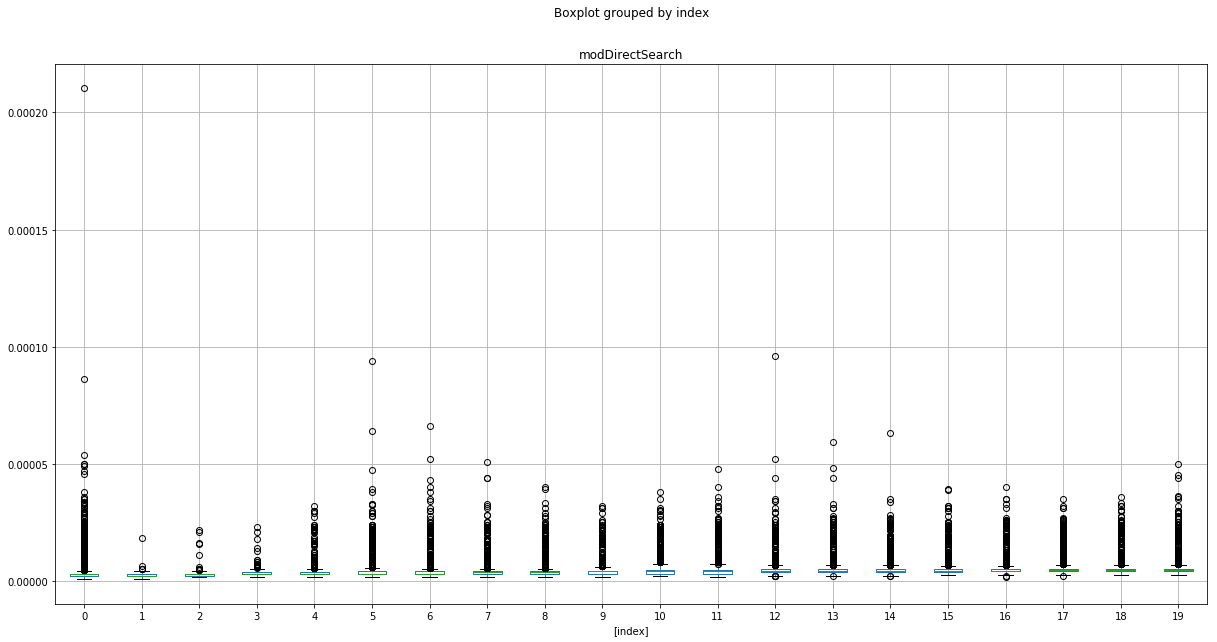

In [45]:
data[(data['index'] < 20)].boxplot(column='modDirectSearch',  by=['index'], figsize=(20,10))
plt.show()

## Фильтрация по subLen

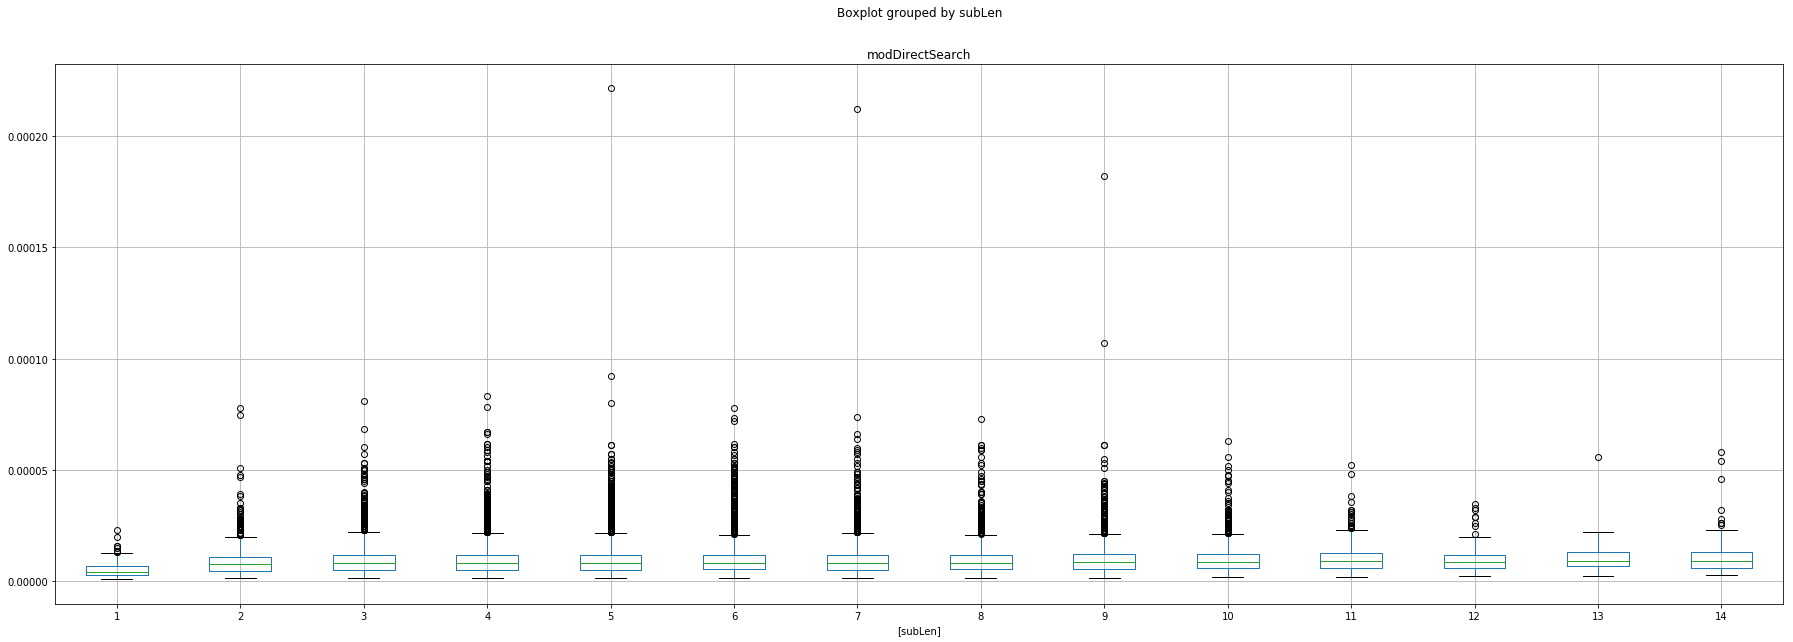

In [11]:
data[:100000].boxplot(column='modDirectSearch',  by=['subLen'], figsize=(30,10))
plt.show()

## Фильтрация по textLen

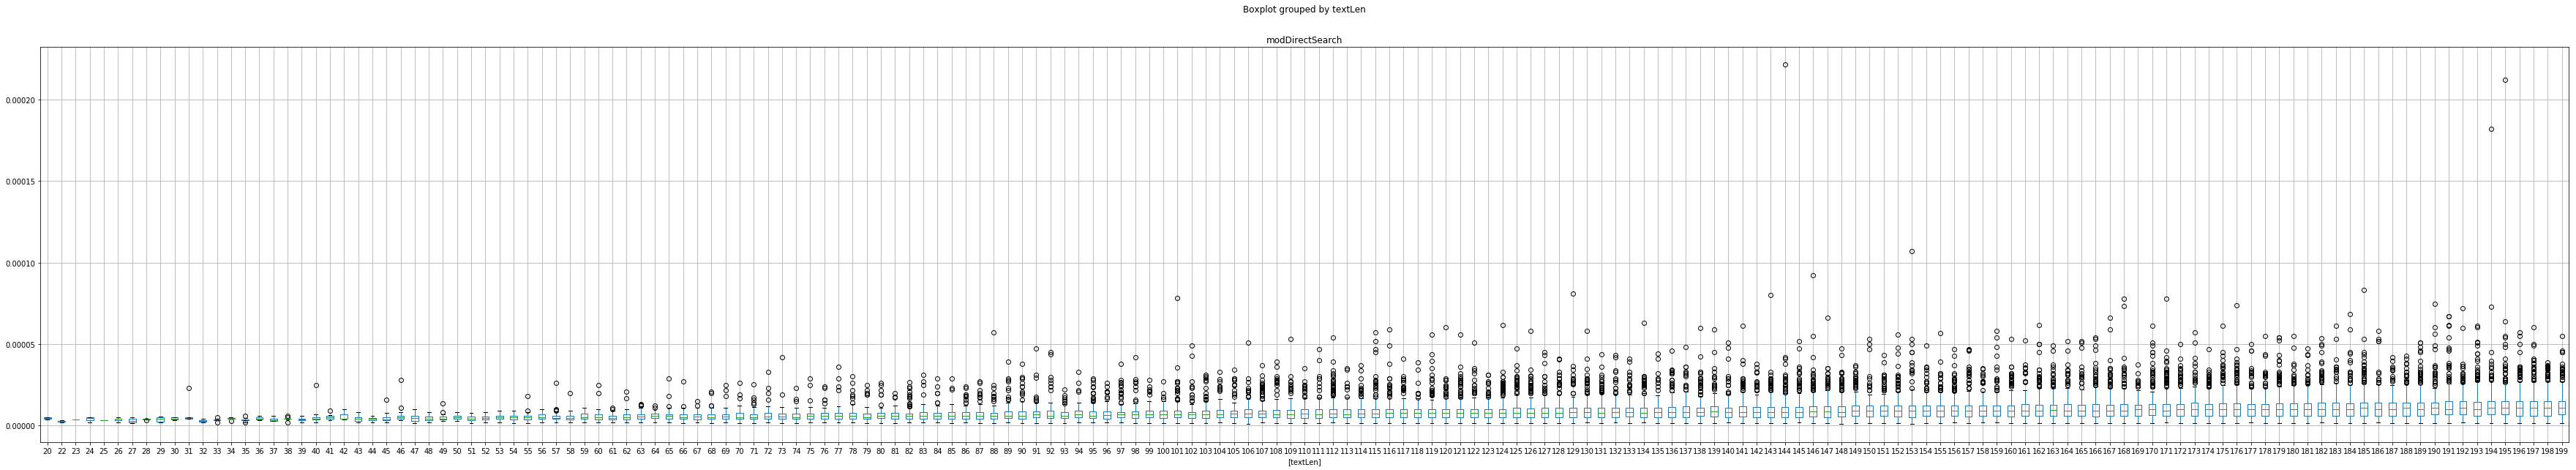

In [12]:
data[:100000].boxplot(column='modDirectSearch',  by=['textLen'], figsize=(60,10))
plt.show()

## Фильтрация по textLen < 30 с index = 0

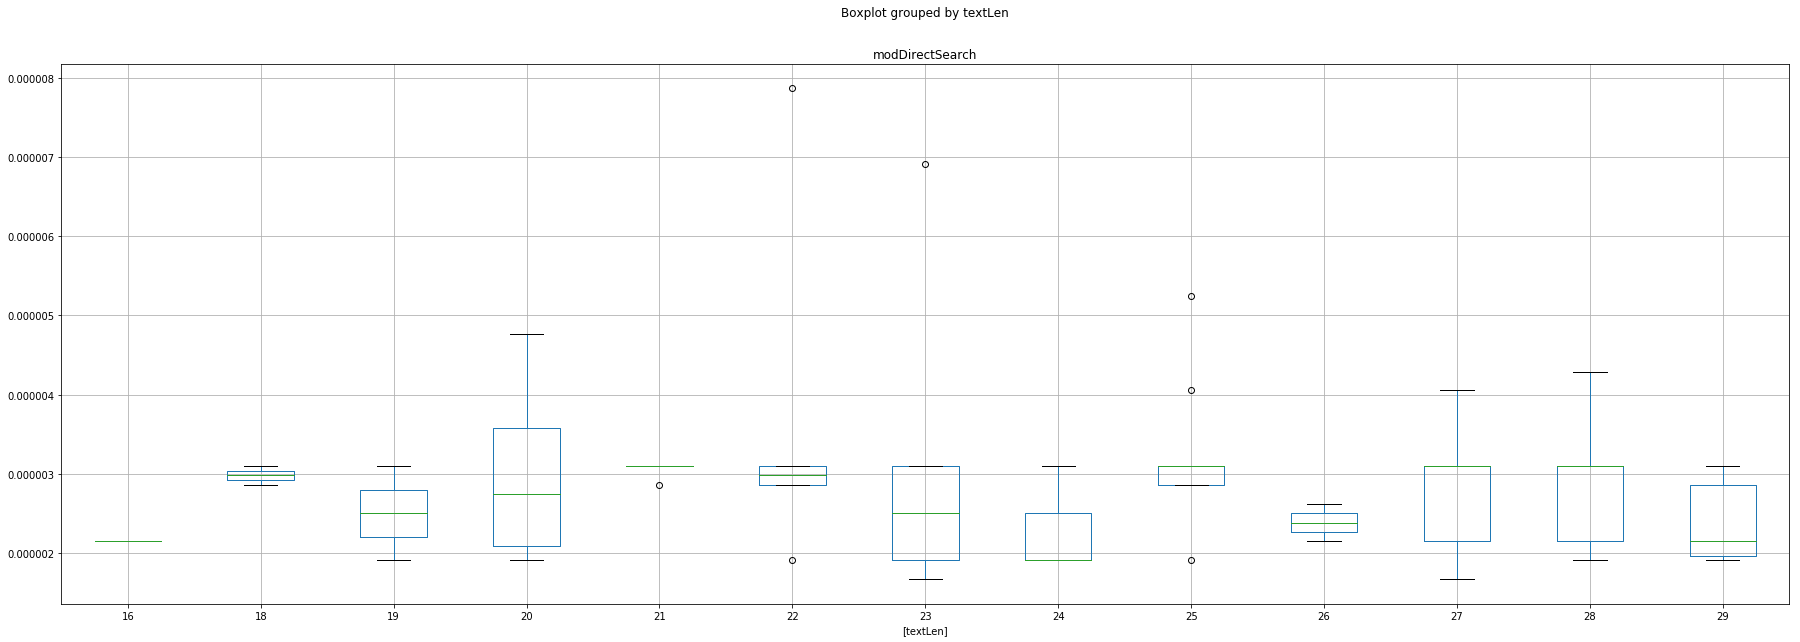

In [18]:
data[(data['index'] == 0) & (data['textLen'] < 30)].boxplot(column='modDirectSearch',  by=['textLen'], figsize=(30,10))
plt.show()

### Вывод с помощью scatter_matrix

Метод scatter_matrix позволяет визуализировать попарные зависимости между признаками (а также распределение каждого признака на диагонали).

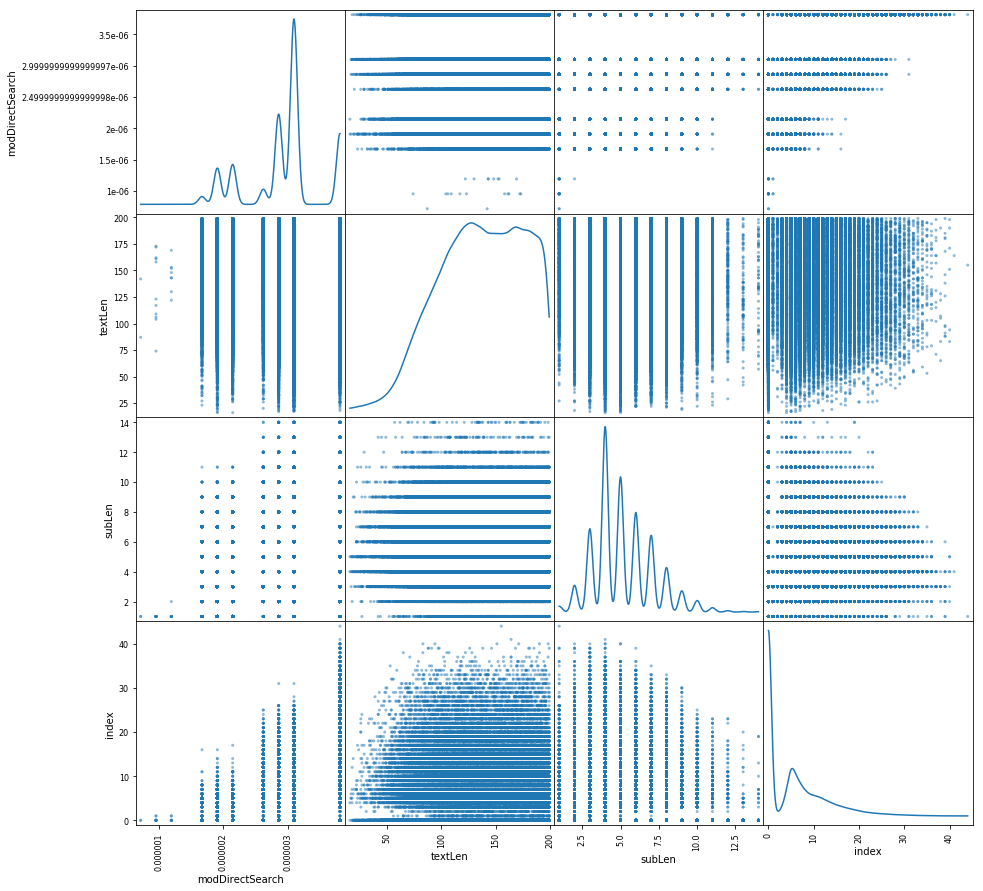

In [19]:
pds.scatter_matrix(tb.sort_values(by='modDirectSearch', ascending=True)[:100000][['modDirectSearch', 'textLen', 'subLen', 'index']], figsize=(15, 15), diagonal='kde')
plt.show()

## kmp

In [17]:
data.describe()

modDirectSearch           kmp             bmx      rabin_karp  \
count     1.000000e+06  1.000000e+06  1000000.000000  1000000.000000   
mean      9.461940e-06  1.227014e-05        0.000019        0.000084   
std       7.027994e-06  8.938497e-06        0.000015        0.000061   
min       7.152557e-07  7.152557e-07        0.000002        0.000004   
25%       5.722046e-06  6.914139e-06        0.000011        0.000039   
50%       8.821487e-06  1.096725e-05        0.000017        0.000076   
75%       1.215935e-05  1.621246e-05        0.000025        0.000119   
max       3.024101e-03  4.241943e-03        0.007261        0.013043   

         aho_find_all      lib_find         textLen          subLen  \
count  1000000.000000  1.000000e+06  1000000.000000  1000000.000000   
mean         0.000040  1.081307e-06      146.637414        5.539207   
std          0.000019  1.317684e-06       35.090324        2.038057   
min          0.000011  0.000000e+00       15.000000        1.000000   
25%          0.000033  9.536743e-07      121.000000        4.000000   
50%          0.000038  9.536743e-07      151.000000        5.000000   
75%          0.000043  1.192093e-06      176.000000        7.000000   
max          0.007536  3.356934e-04      199.000000       14.000000   

                index  
count  1000000.000000  
mean        68.963006  
std         47.534148  
min          0.000000  
25%         29.000000  
50%         63.000000  
75%        104.000000  
max        197.000000

### Отфильтруем данные по textLen, subLen, index и построим box plot
Он позволяет компактно визуализировать основные характеристики (медиану, нижний и верхний квартили, минимальное и максимальное значение, выбросы) распределения признаков.

Изменяемое значение | Интервал значений
---| ---
textLen | 15 - 200
subLen | 1 - 14
index | 0 - 197

Чтобы оптимизировать нагрузку уменьшим кол-во данных до 10000 с помощью среза данных.

## Фильтрация по index

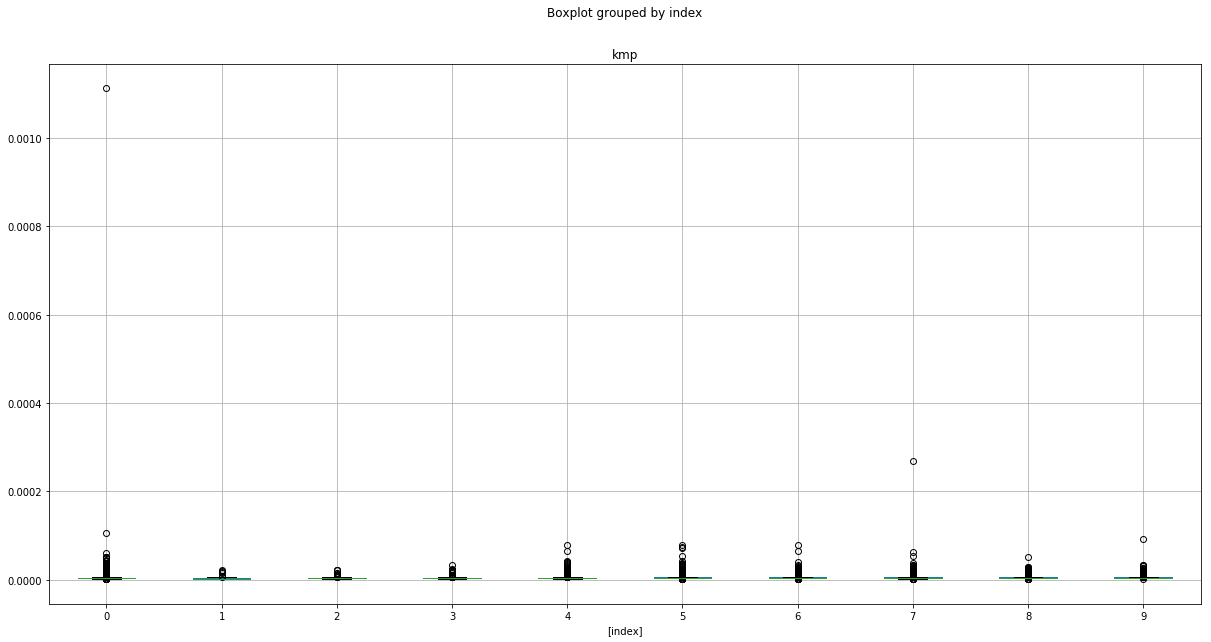

In [21]:
data[(data['index'] < 10)].boxplot(column='kmp',  by=['index'], figsize=(20,10))
plt.show()

## Фильтрация по subLen

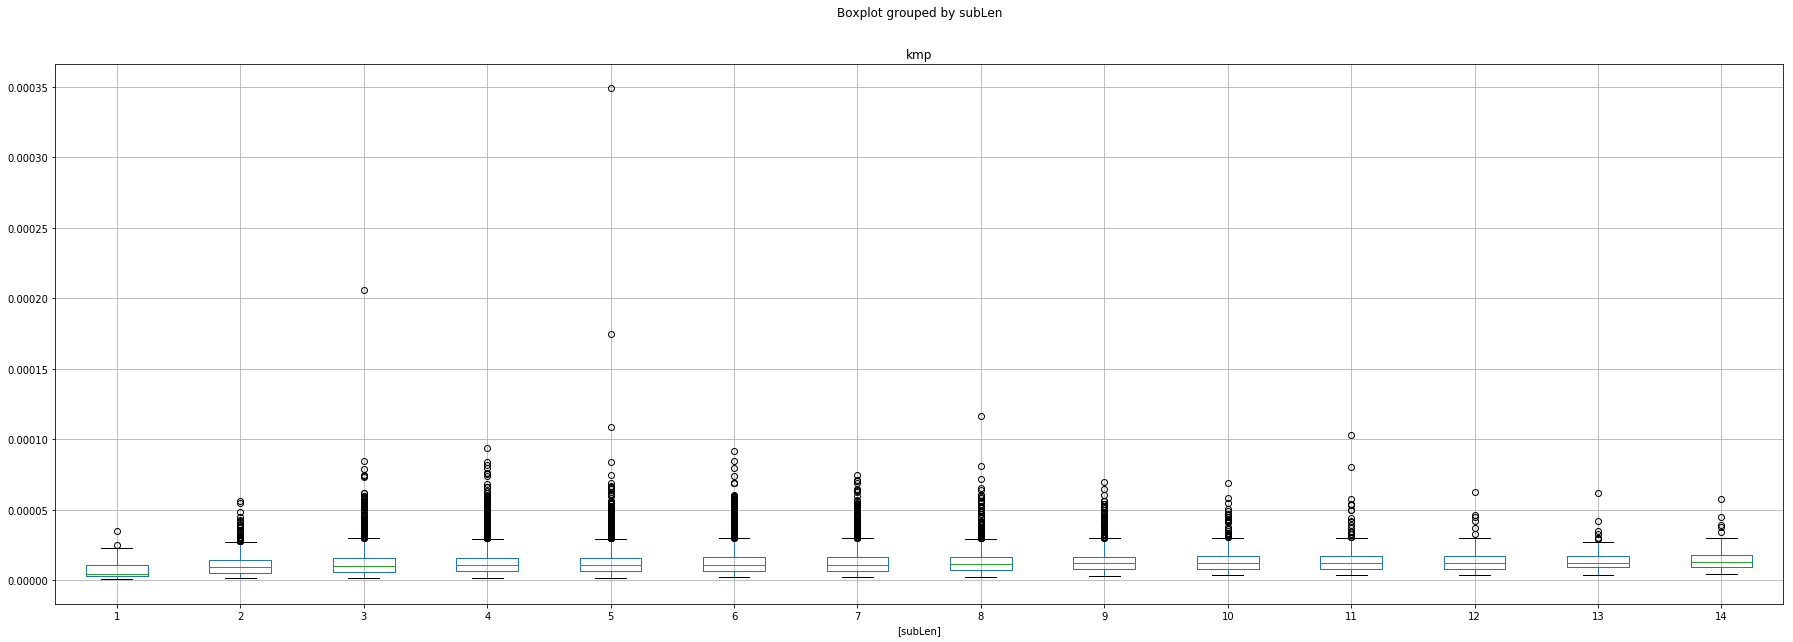

In [22]:
data[:100000].boxplot(column='kmp',  by=['subLen'], figsize=(30,10))
plt.show()

## Фильтрация по textLen

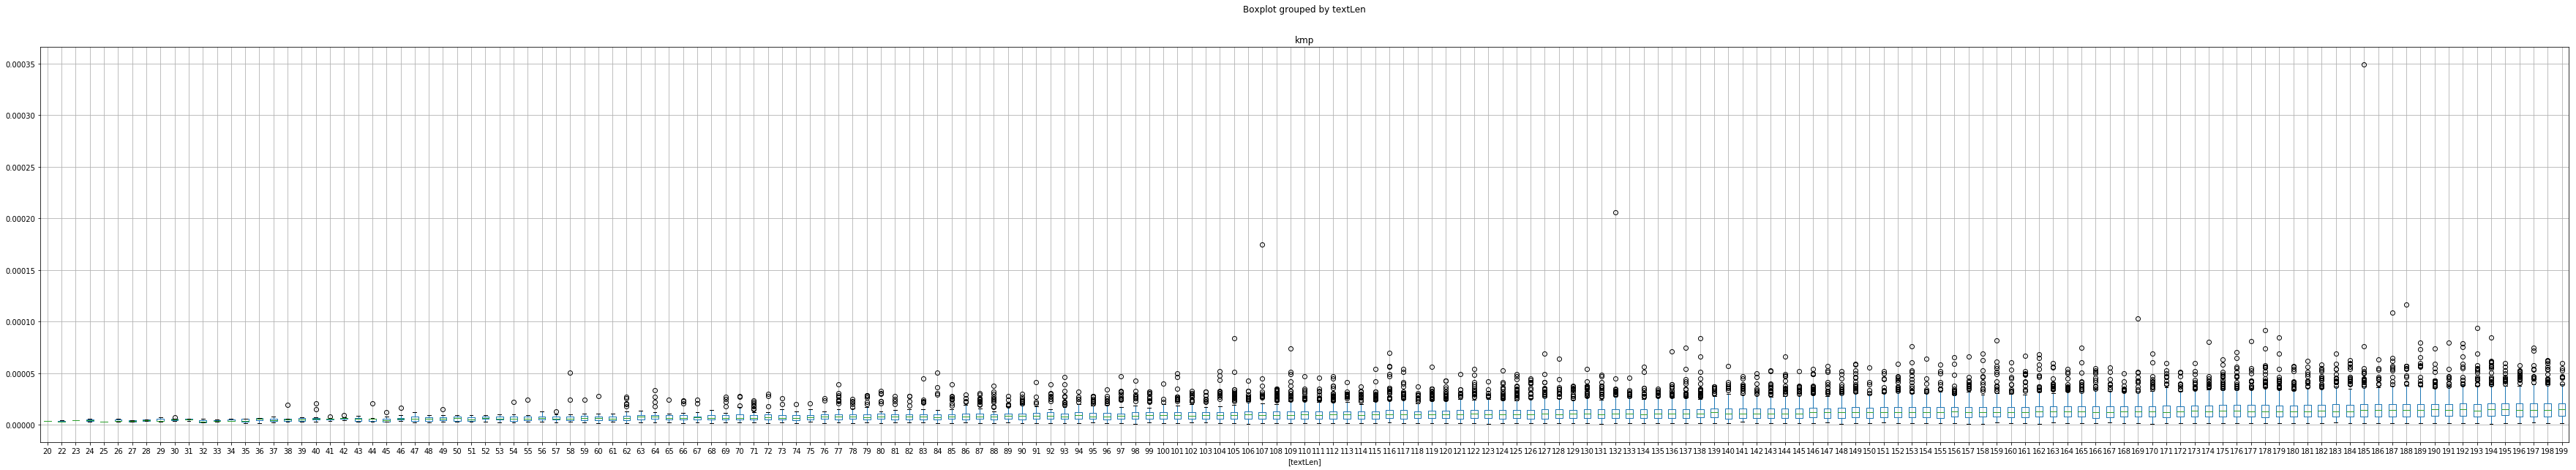

In [23]:
data[:100000].boxplot(column='kmp',  by=['textLen'], figsize=(60,10))
plt.show()

## Фильтрация по textLen < 30 с index = 0

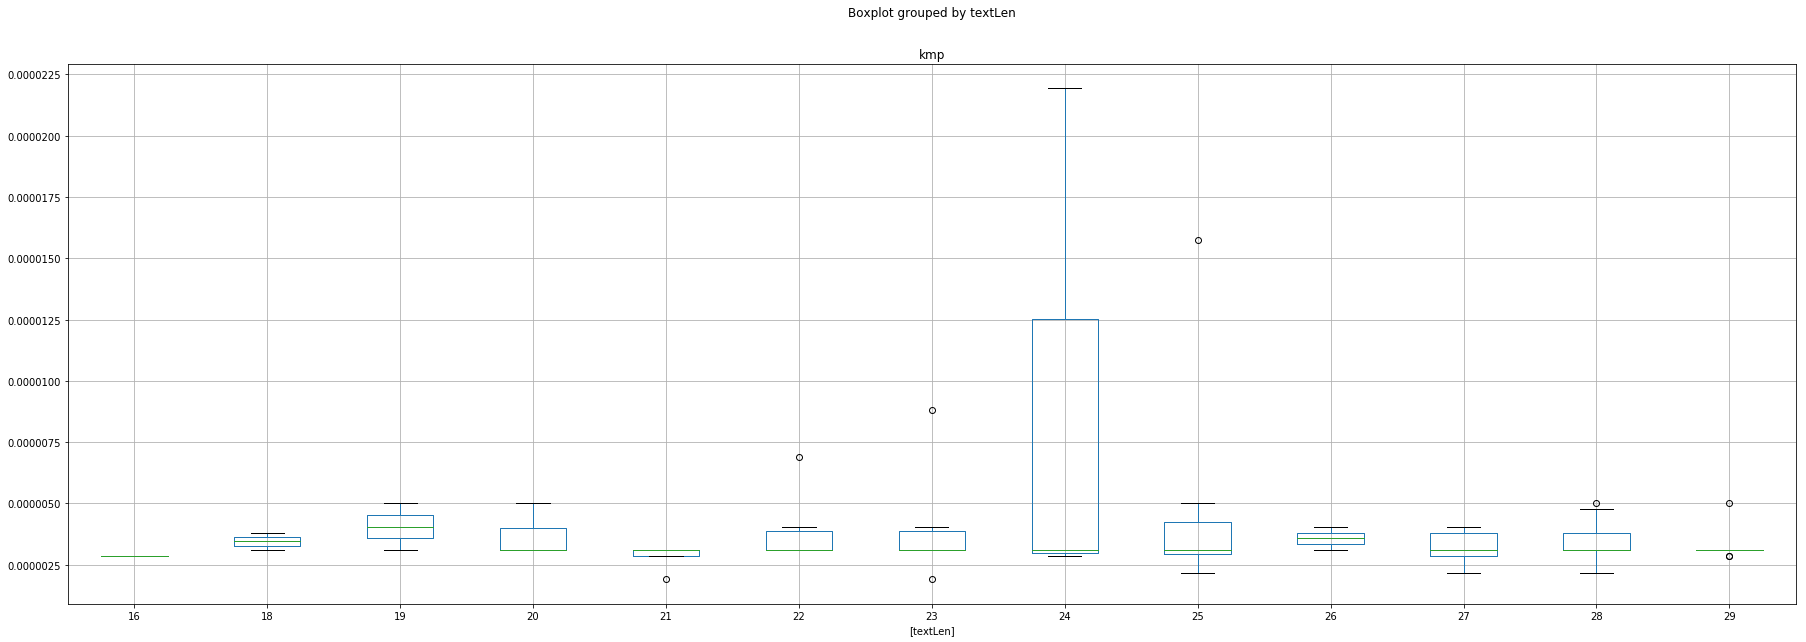

In [24]:
data[(data['index'] == 0) & (data['textLen'] < 30)].boxplot(column='kmp',  by=['textLen'], figsize=(30,10))
plt.show()

### Вывод с помощью scatter_matrix

Метод scatter_matrix позволяет визуализировать попарные зависимости между признаками (а также распределение каждого признака на диагонали).

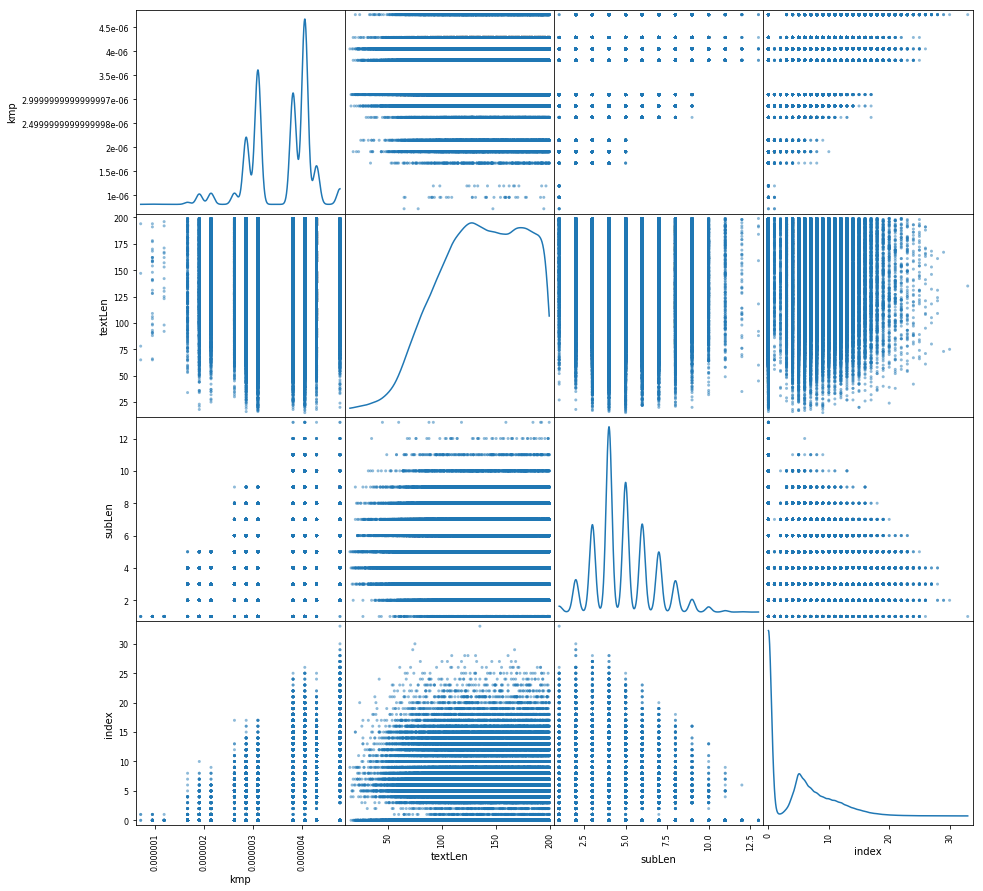

In [24]:
pds.scatter_matrix(tb.sort_values(by='kmp', ascending=True)[:100000][['kmp', 'textLen', 'subLen', 'index']], figsize=(15, 15), diagonal='kde')
plt.show()

## bmx

In [21]:
data.describe()

modDirectSearch           kmp             bmx      rabin_karp  \
count     1.000000e+06  1.000000e+06  1000000.000000  1000000.000000   
mean      9.461940e-06  1.227014e-05        0.000019        0.000084   
std       7.027994e-06  8.938497e-06        0.000015        0.000061   
min       7.152557e-07  7.152557e-07        0.000002        0.000004   
25%       5.722046e-06  6.914139e-06        0.000011        0.000039   
50%       8.821487e-06  1.096725e-05        0.000017        0.000076   
75%       1.215935e-05  1.621246e-05        0.000025        0.000119   
max       3.024101e-03  4.241943e-03        0.007261        0.013043   

         aho_find_all      lib_find         textLen          subLen  \
count  1000000.000000  1.000000e+06  1000000.000000  1000000.000000   
mean         0.000040  1.081307e-06      146.637414        5.539207   
std          0.000019  1.317684e-06       35.090324        2.038057   
min          0.000011  0.000000e+00       15.000000        1.000000   
25%          0.000033  9.536743e-07      121.000000        4.000000   
50%          0.000038  9.536743e-07      151.000000        5.000000   
75%          0.000043  1.192093e-06      176.000000        7.000000   
max          0.007536  3.356934e-04      199.000000       14.000000   

                index  
count  1000000.000000  
mean        68.963006  
std         47.534148  
min          0.000000  
25%         29.000000  
50%         63.000000  
75%        104.000000  
max        197.000000

### Отфильтруем данные по textLen, subLen, index и построим box plot
Он позволяет компактно визуализировать основные характеристики (медиану, нижний и верхний квартили, минимальное и максимальное значение, выбросы) распределения признаков.

Изменяемое значение | Интервал значений
---| ---
textLen | 15 - 200
subLen | 1 - 14
index | 0 - 197

Чтобы оптимизировать нагрузку уменьшим кол-во данных до 10000 с помощью среза данных.

## Фильтрация по index

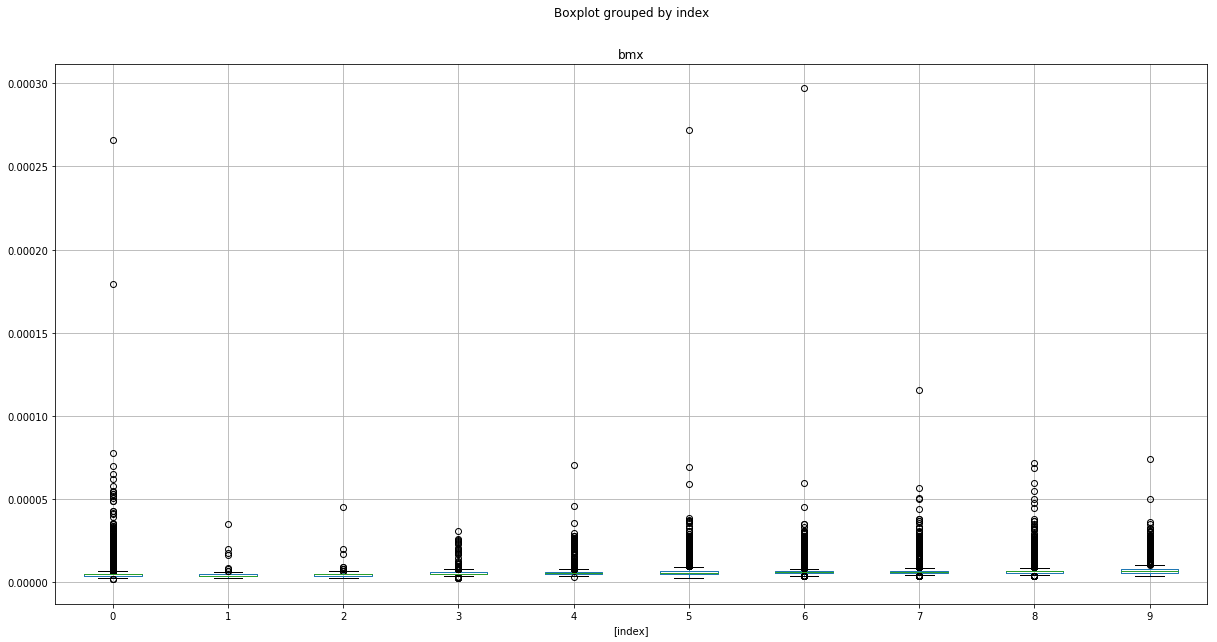

In [25]:
data[(data['index'] < 10)].boxplot(column='bmx',  by=['index'], figsize=(20,10))
plt.show()

## Фильтрация по subLen

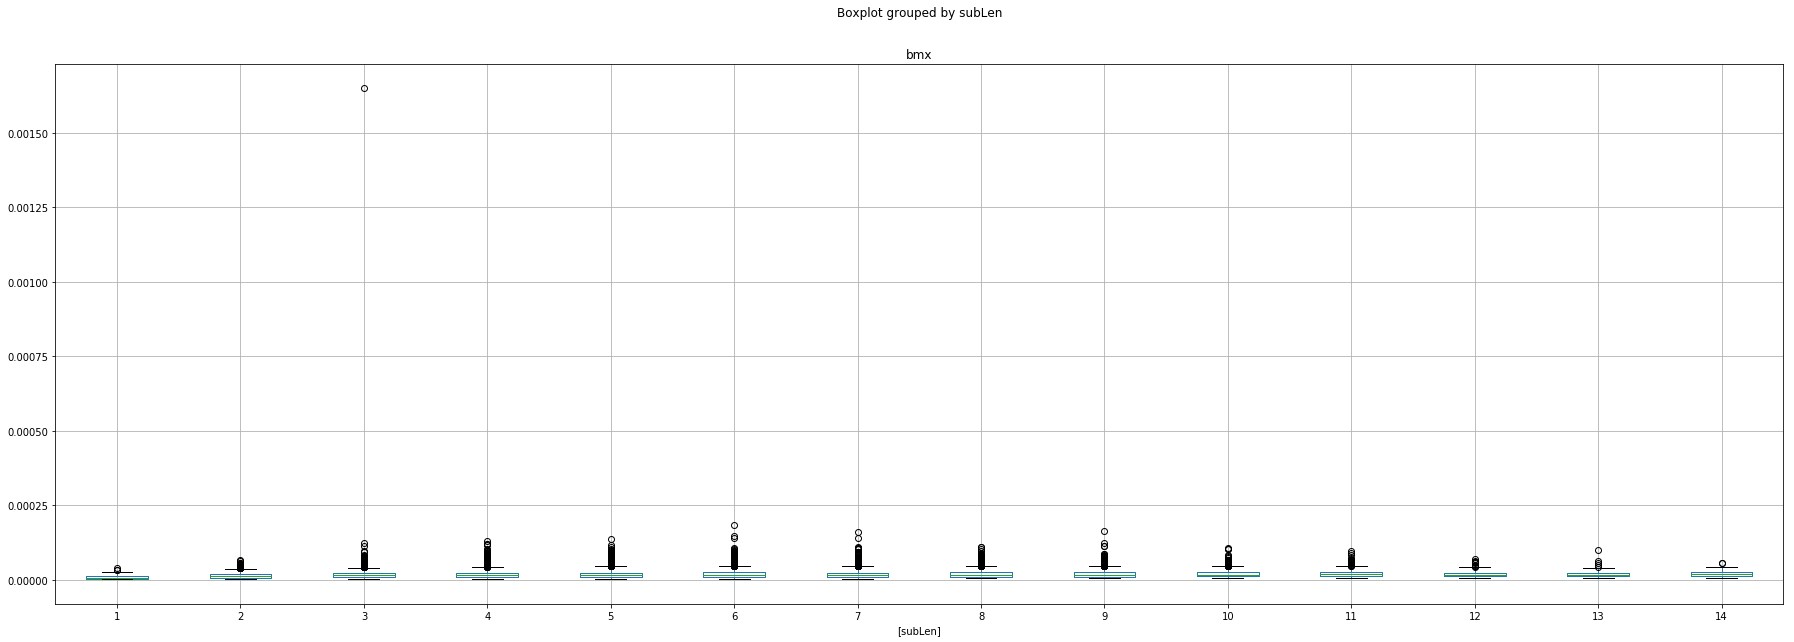

In [26]:
data[:100000].boxplot(column='bmx',  by=['subLen'], figsize=(30,10))
plt.show()

## Фильтрация по textLen

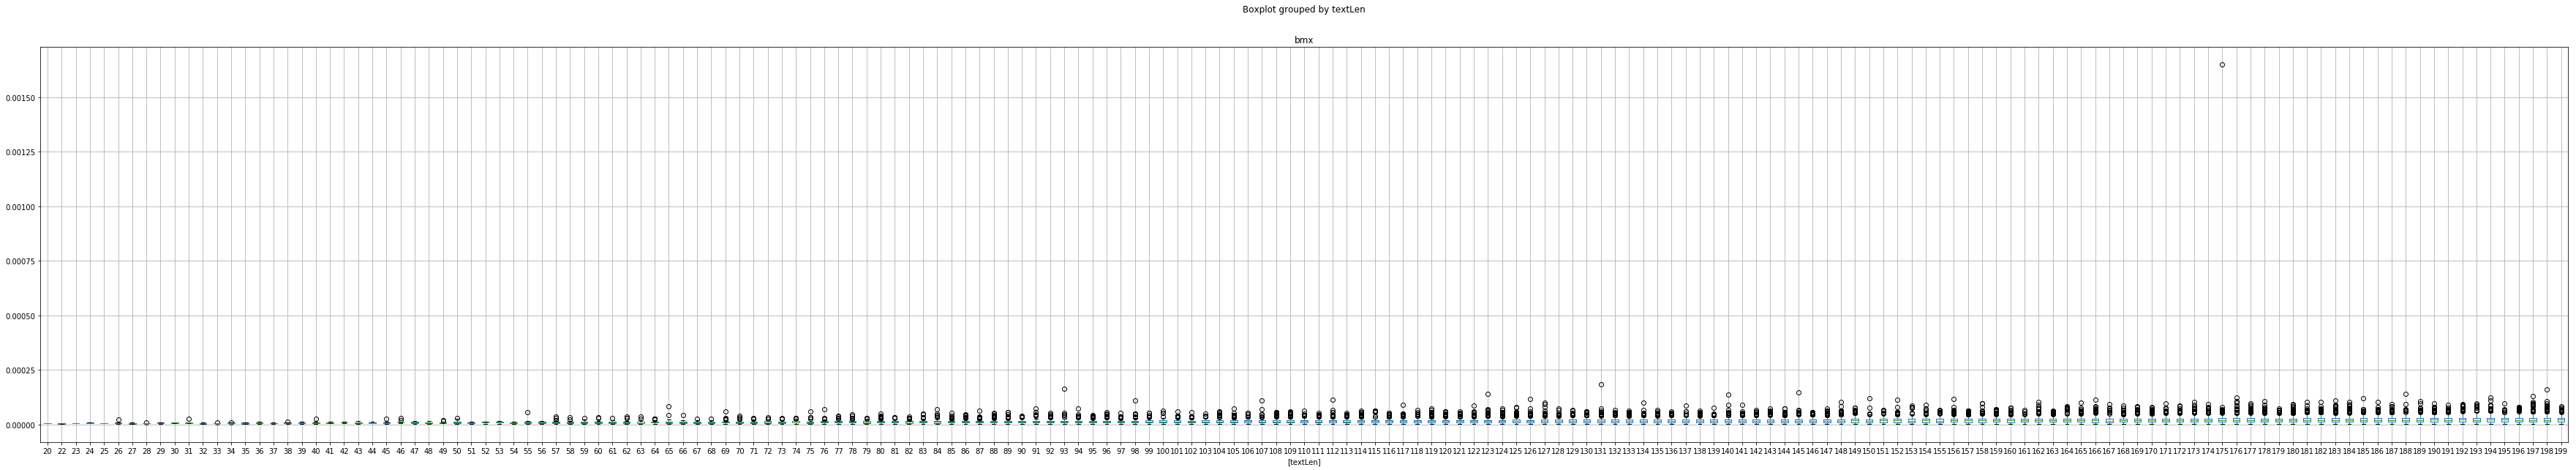

In [27]:
data[:100000].boxplot(column='bmx',  by=['textLen'], figsize=(60,10))
plt.show()

## Фильтрация по textLen < 30 с index = 0

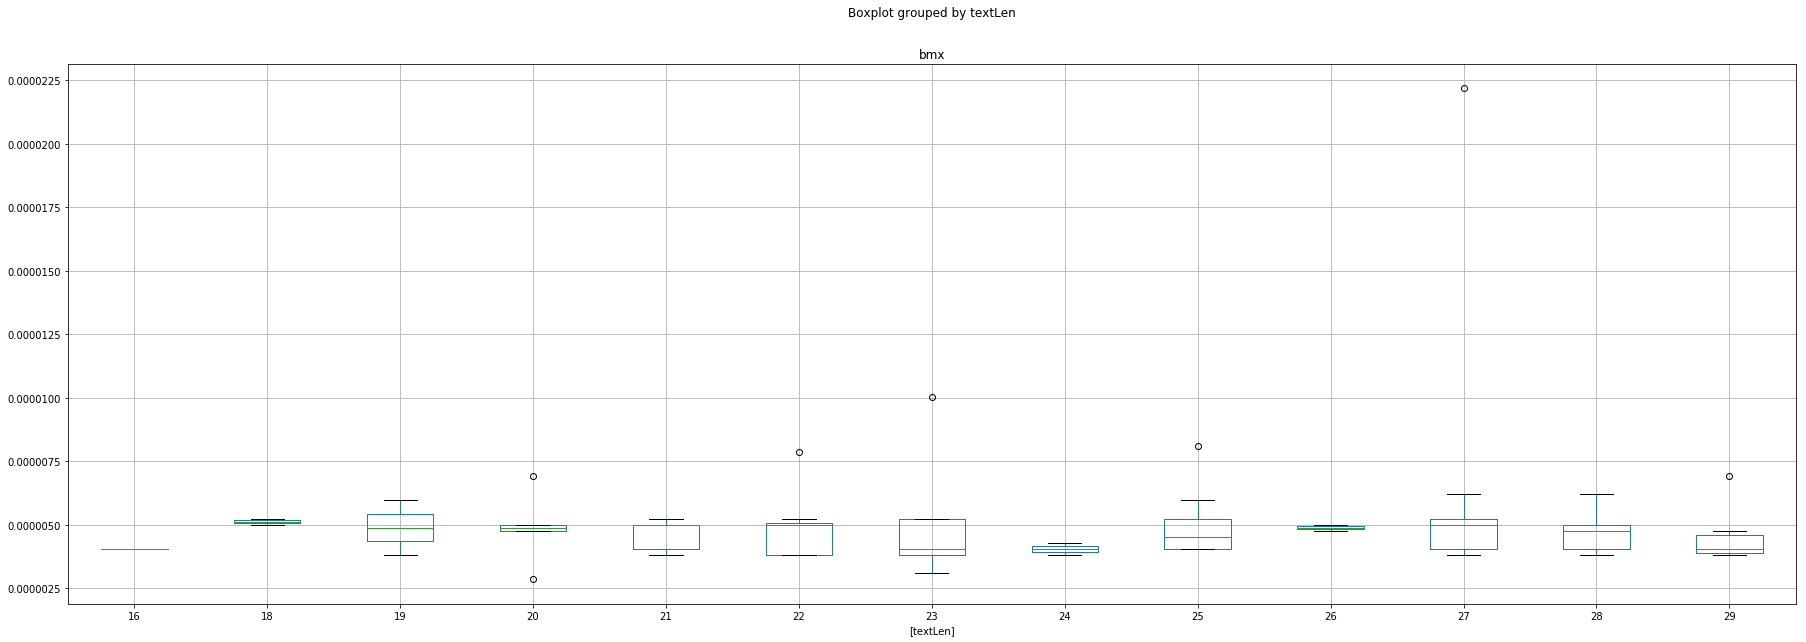

In [28]:
data[(data['index'] == 0) & (data['textLen'] < 30)].boxplot(column='bmx',  by=['textLen'], figsize=(30,10))
plt.show()

### Вывод с помощью scatter_matrix

Метод scatter_matrix позволяет визуализировать попарные зависимости между признаками (а также распределение каждого признака на диагонали).

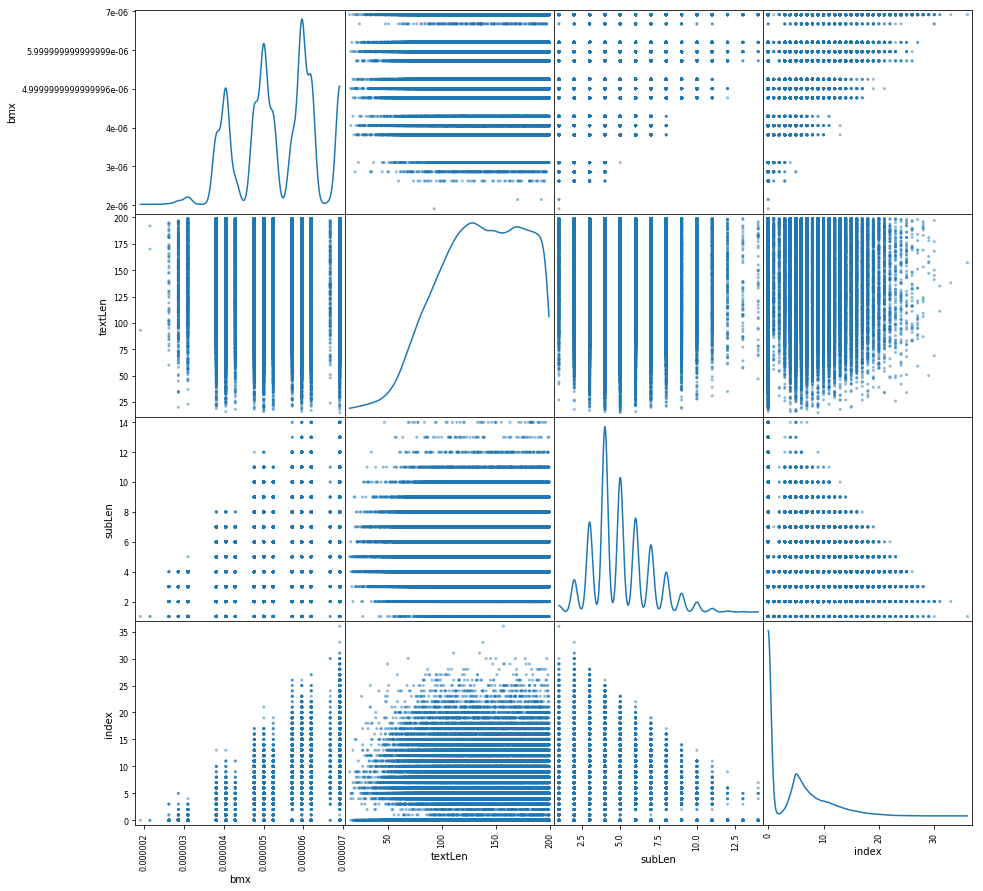

In [26]:
pds.scatter_matrix(tb.sort_values(by='bmx', ascending=True)[:100000][['bmx', 'textLen', 'subLen', 'index']], figsize=(15, 15), diagonal='kde')
plt.show()

## rabin_karp

In [48]:
data.describe()

modDirectSearch           kmp             bmx      rabin_karp  \
count     1.000000e+06  1.000000e+06  1000000.000000  1000000.000000   
mean      9.461940e-06  1.227014e-05        0.000019        0.000084   
std       7.027994e-06  8.938497e-06        0.000015        0.000061   
min       7.152557e-07  7.152557e-07        0.000002        0.000004   
25%       5.722046e-06  6.914139e-06        0.000011        0.000039   
50%       8.821487e-06  1.096725e-05        0.000017        0.000076   
75%       1.215935e-05  1.621246e-05        0.000025        0.000119   
max       3.024101e-03  4.241943e-03        0.007261        0.013043   

         aho_find_all      lib_find         textLen          subLen  \
count  1000000.000000  1.000000e+06  1000000.000000  1000000.000000   
mean         0.000040  1.081307e-06      146.637414        5.539207   
std          0.000019  1.317684e-06       35.090324        2.038057   
min          0.000011  0.000000e+00       15.000000        1.000000   
25%          0.000033  9.536743e-07      121.000000        4.000000   
50%          0.000038  9.536743e-07      151.000000        5.000000   
75%          0.000043  1.192093e-06      176.000000        7.000000   
max          0.007536  3.356934e-04      199.000000       14.000000   

                index  
count  1000000.000000  
mean        68.963006  
std         47.534148  
min          0.000000  
25%         29.000000  
50%         63.000000  
75%        104.000000  
max        197.000000

### Отфильтруем данные по textLen, subLen, index и построим box plot
Он позволяет компактно визуализировать основные характеристики (медиану, нижний и верхний квартили, минимальное и максимальное значение, выбросы) распределения признаков.

Изменяемое значение | Интервал значений
---| ---
textLen | 15 - 200
subLen | 1 - 14
index | 0 - 197

Чтобы оптимизировать нагрузку уменьшим кол-во данных до 10000 с помощью среза данных.

## Фильтрация по index

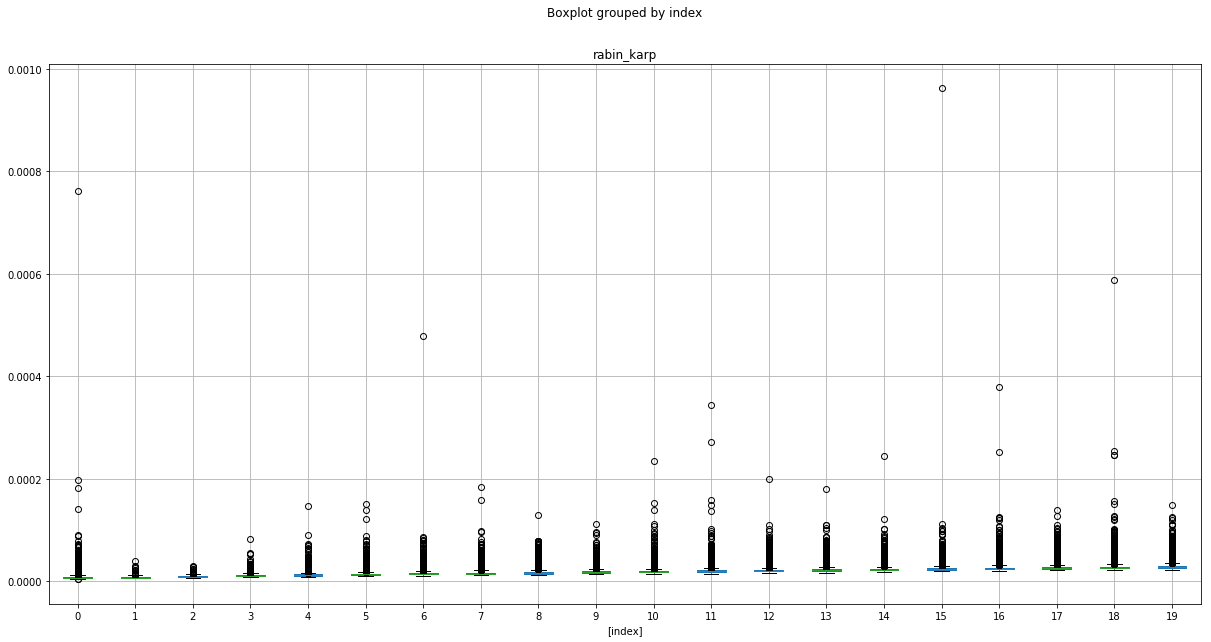

In [30]:
data[(data['index'] < 20)].boxplot(column='rabin_karp',  by=['index'], figsize=(20,10))
plt.show()

## Фильтрация по subLen

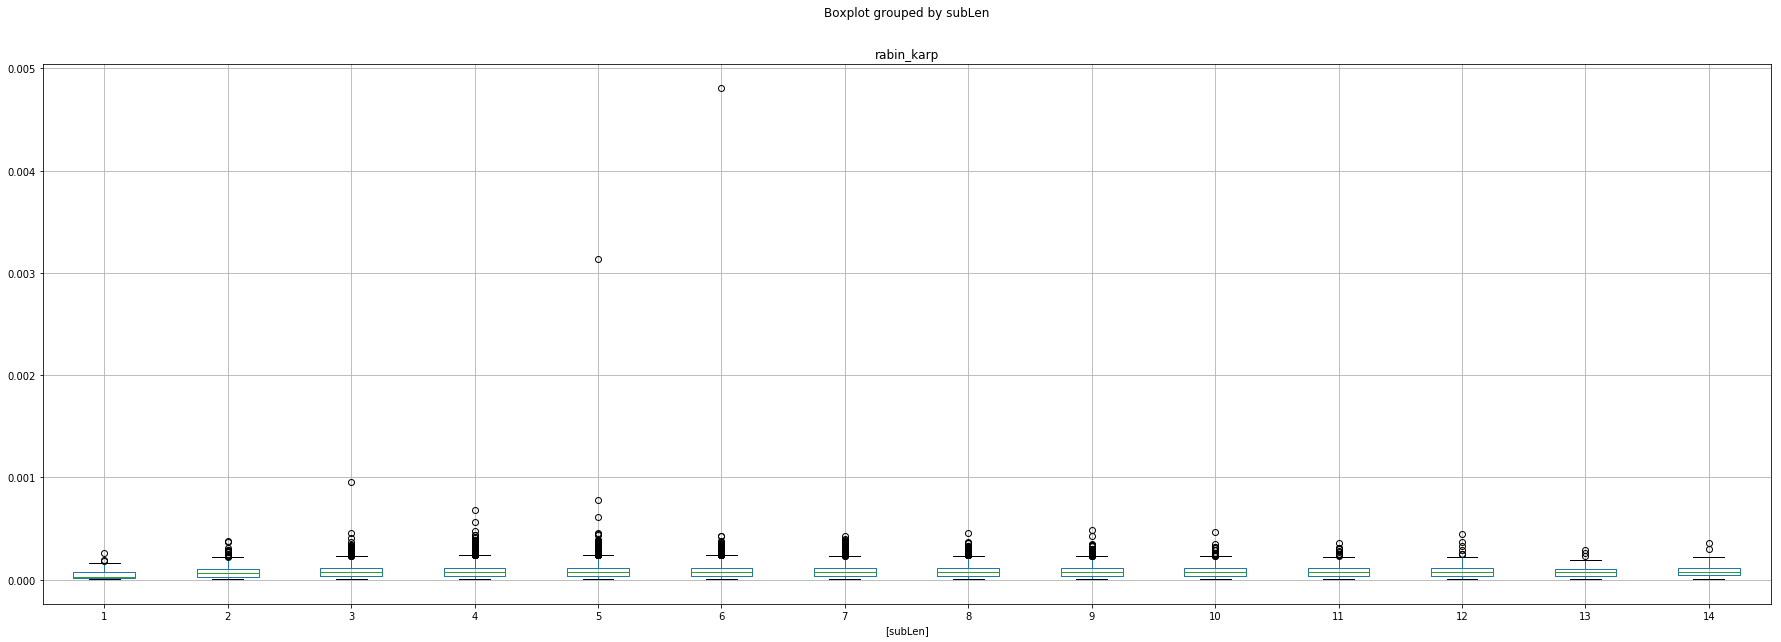

In [31]:
data[:100000].boxplot(column='rabin_karp',  by=['subLen'], figsize=(30,10))
plt.show()

## Фильтрация по textLen

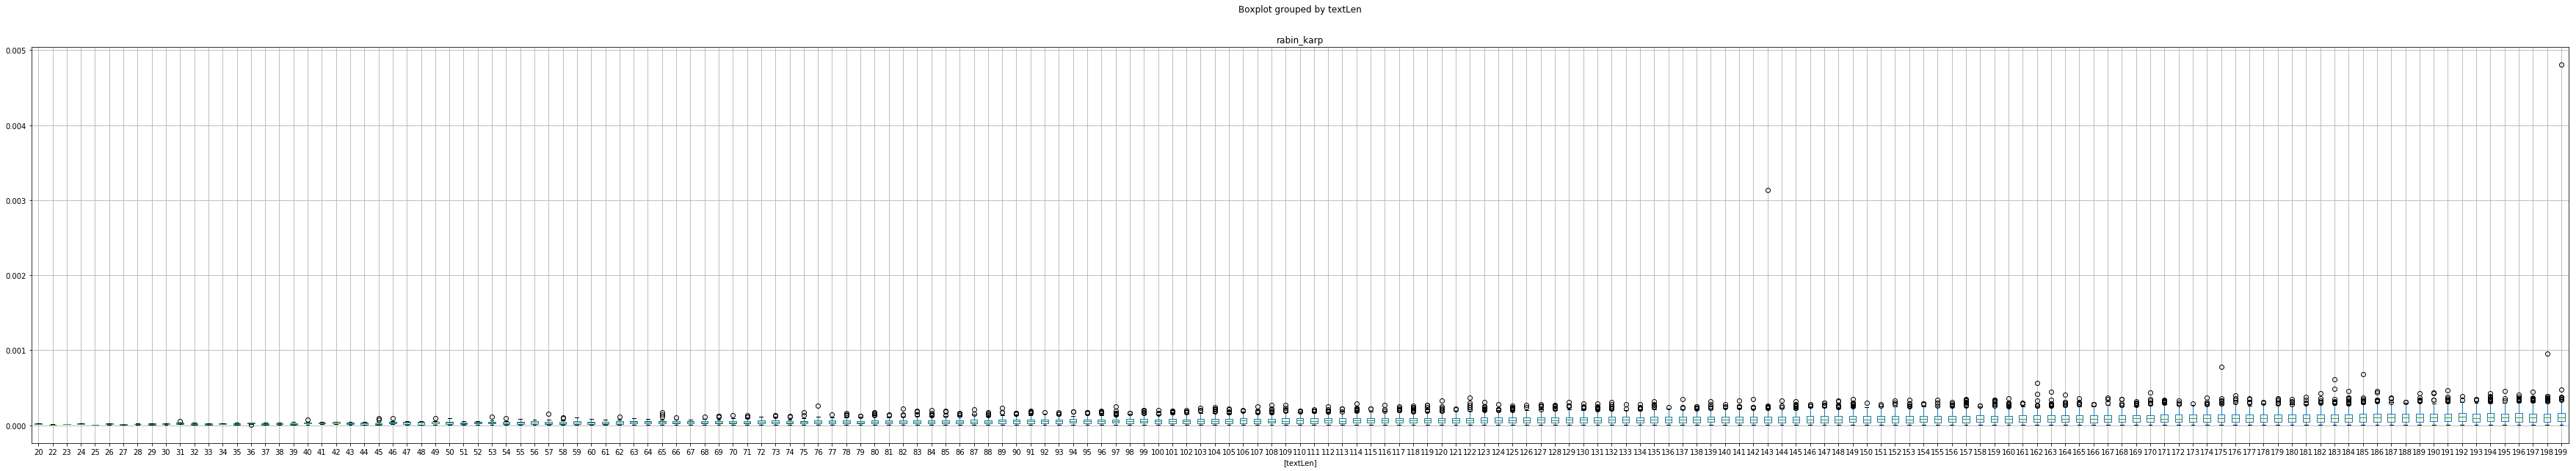

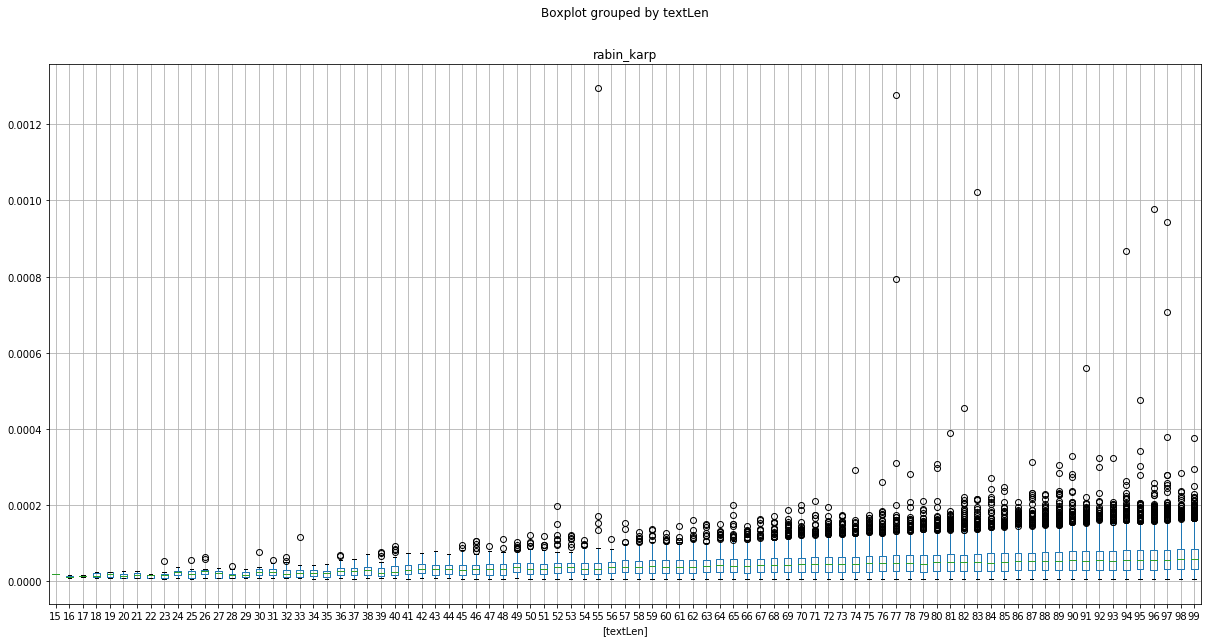

In [35]:
data[:100000].boxplot(column='rabin_karp',  by=['textLen'], figsize=(60,10))
plt.show()
data[(data['textLen'] < 100)].boxplot(column='rabin_karp',  by=['textLen'], figsize=(20,10))
plt.show()

## Фильтрация по textLen < 30 с index = 0

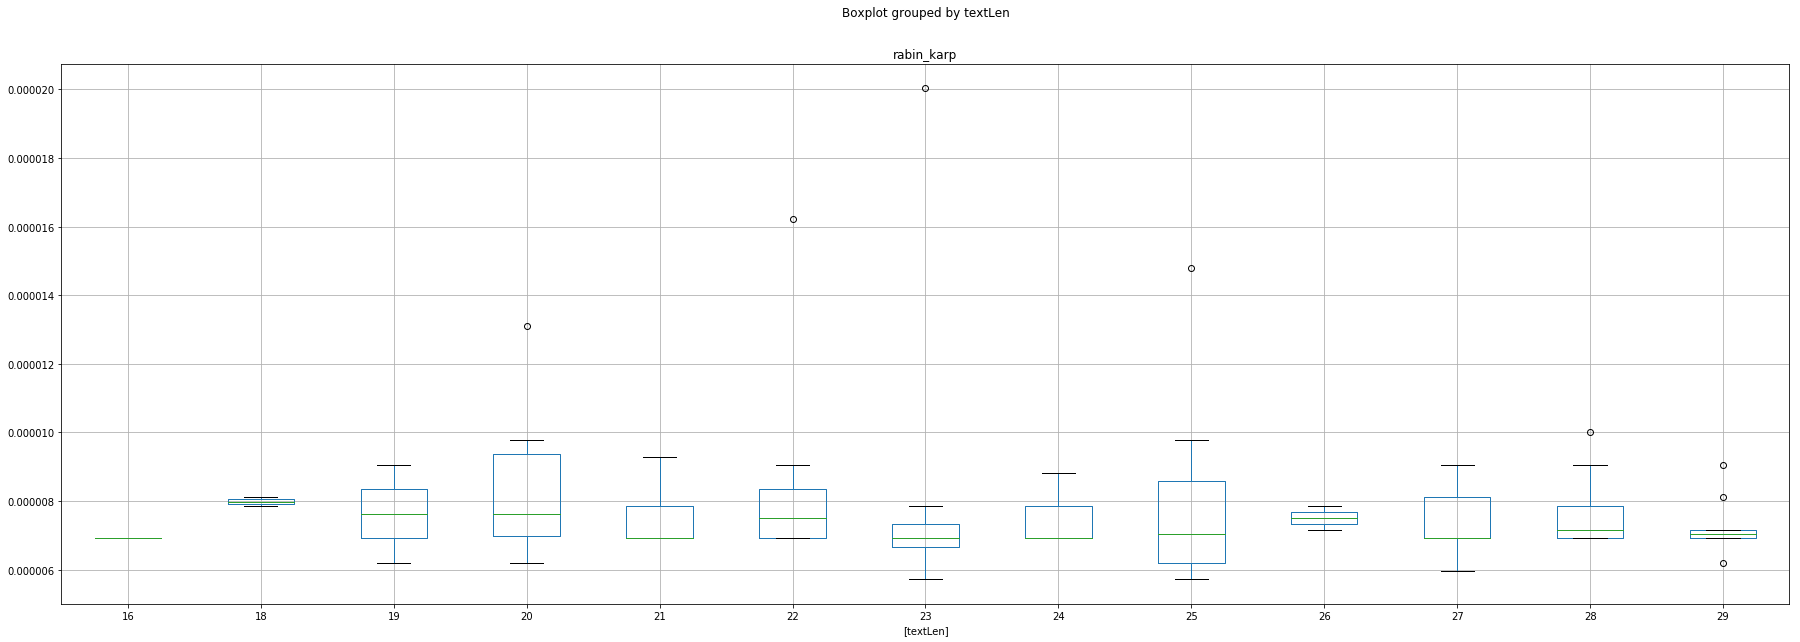

In [33]:
data[(data['index'] == 0) & (data['textLen'] < 30)].boxplot(column='rabin_karp',  by=['textLen'], figsize=(30,10))
plt.show()

### Вывод с помощью scatter_matrix

Метод scatter_matrix позволяет визуализировать попарные зависимости между признаками (а также распределение каждого признака на диагонали).

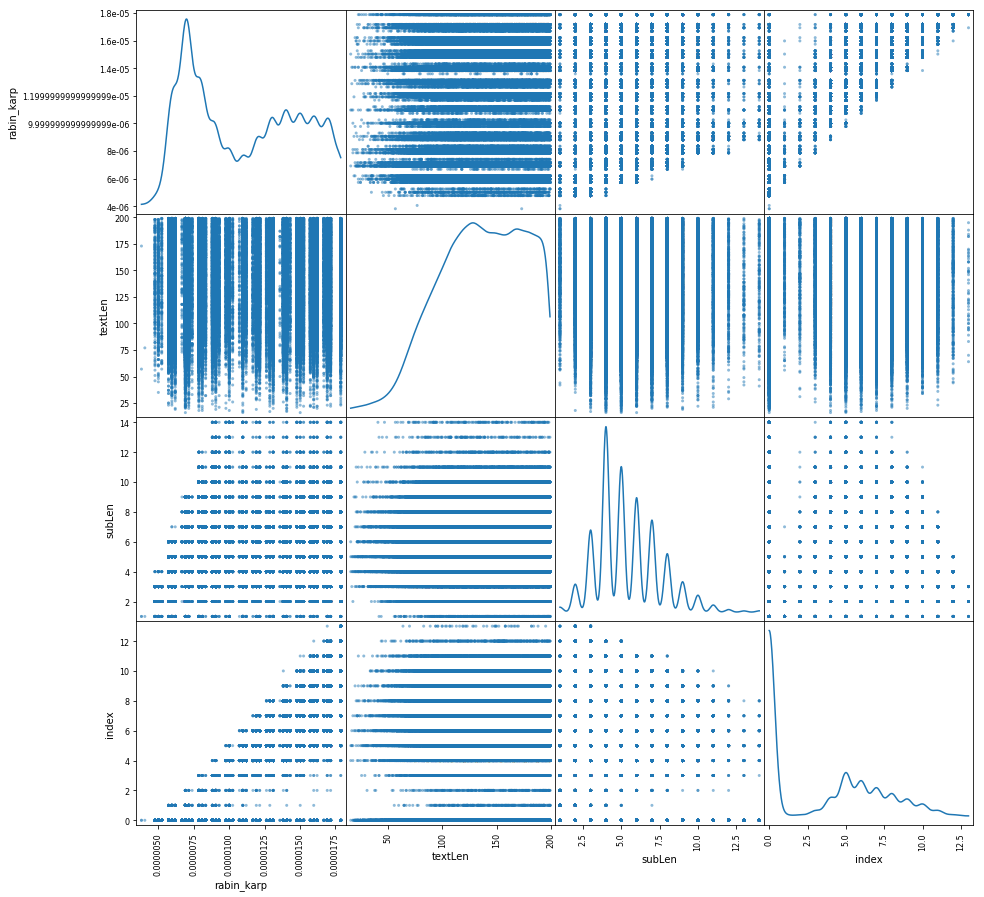

In [27]:
pds.scatter_matrix(tb.sort_values(by='rabin_karp', ascending=True)[:100000][['rabin_karp', 'textLen', 'subLen', 'index']], figsize=(15, 15), diagonal='kde')
plt.show()

## aho_find_all

### Отфильтруем данные по textLen, subLen, index и построим box plot
Он позволяет компактно визуализировать основные характеристики (медиану, нижний и верхний квартили, минимальное и максимальное значение, выбросы) распределения признаков.

Изменяемое значение | Интервал значений
---| ---
textLen | 15 - 200
subLen | 1 - 14
index | 0 - 197

Чтобы оптимизировать нагрузку уменьшим кол-во данных до 10000 с помощью среза данных.

## Фильтрация по index

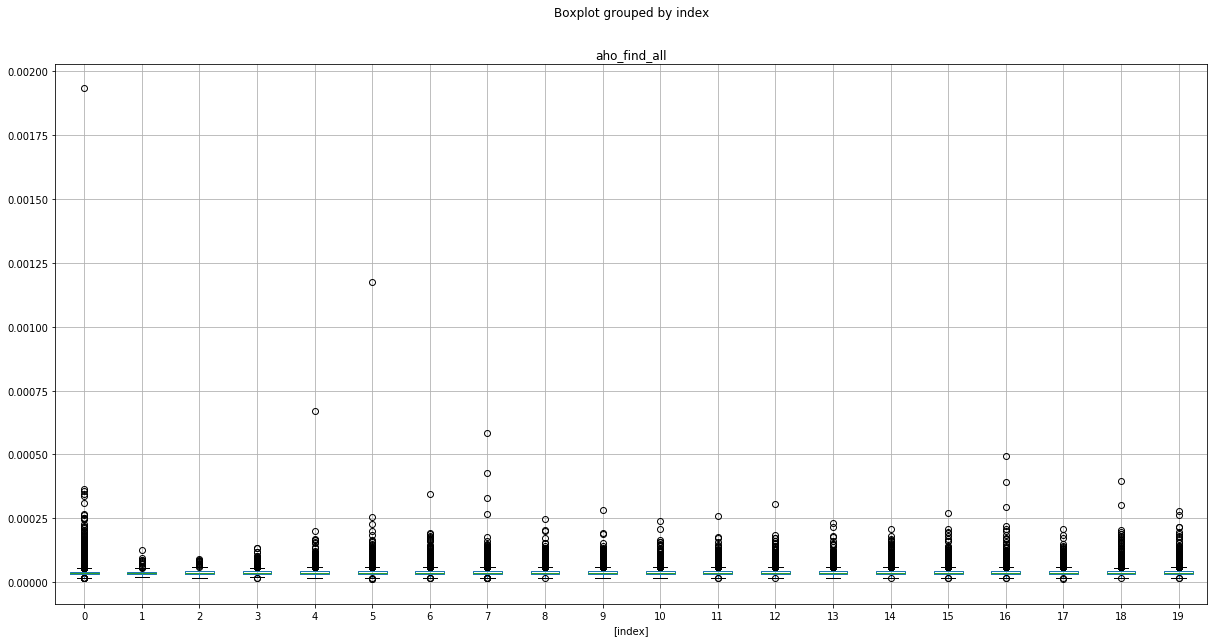

In [36]:
data[(data['index'] < 20)].boxplot(column='aho_find_all',  by=['index'], figsize=(20,10))
plt.show()

## Фильтрация по subLen

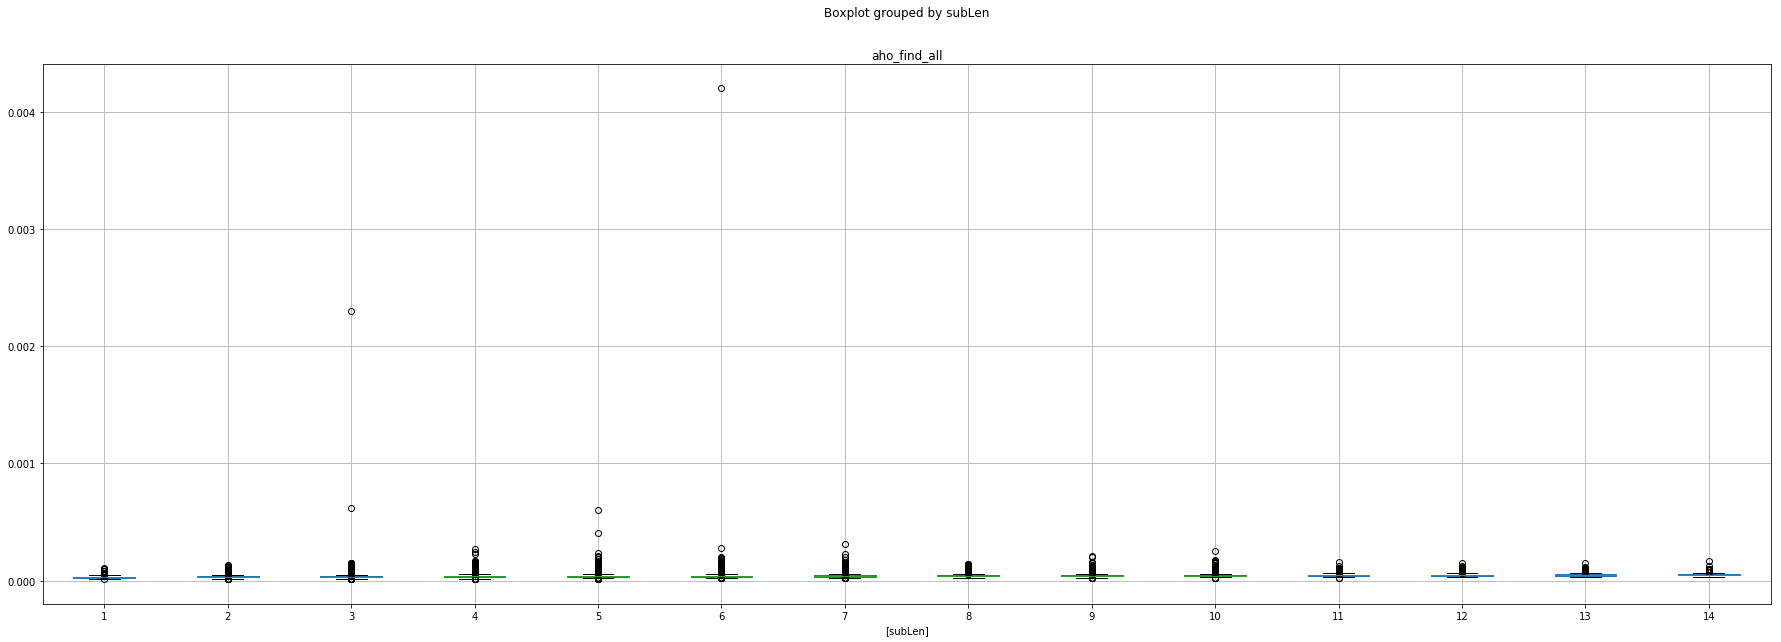

In [37]:
data[:100000].boxplot(column='aho_find_all',  by=['subLen'], figsize=(30,10))
plt.show()

## Фильтрация по textLen

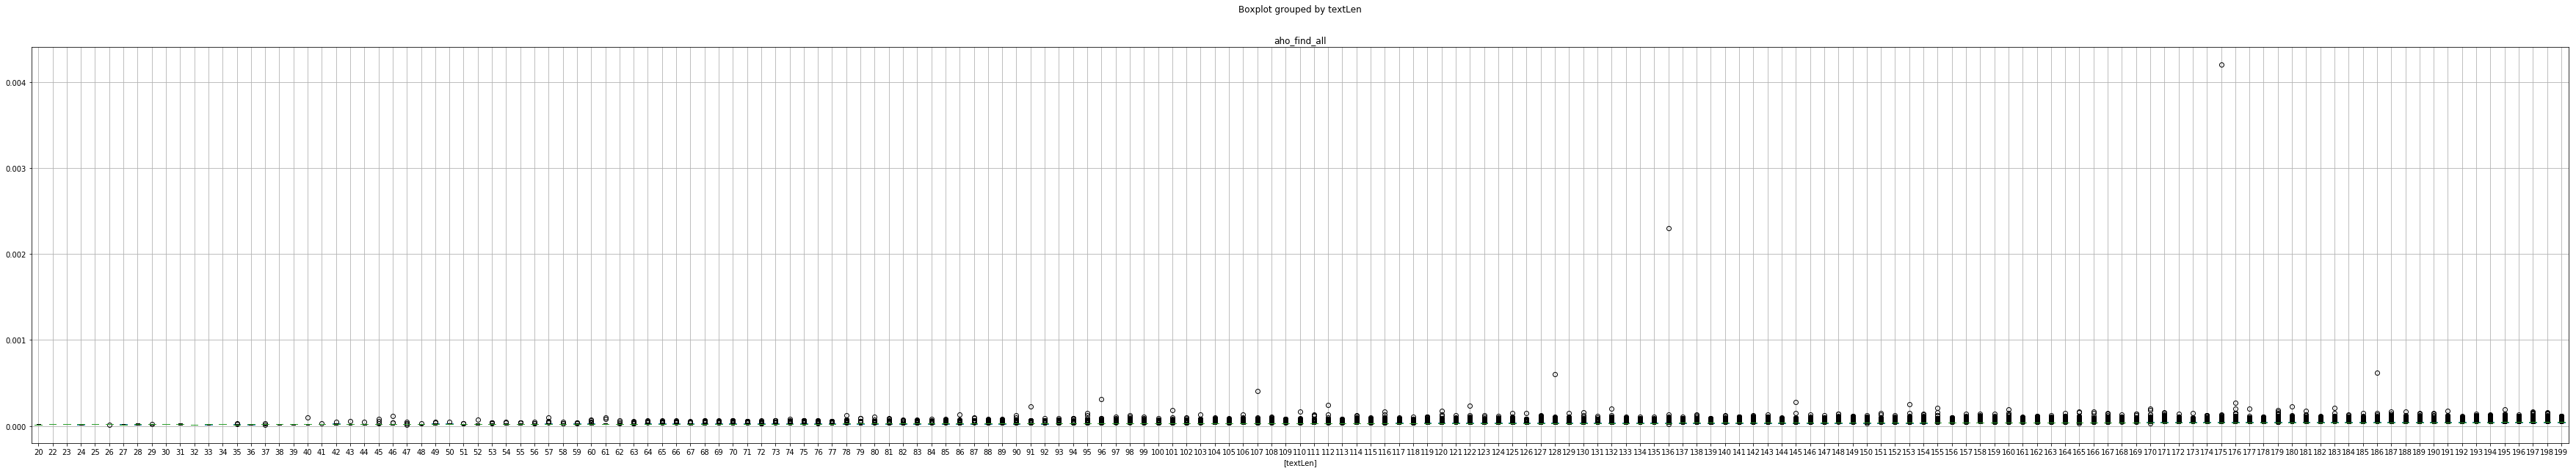

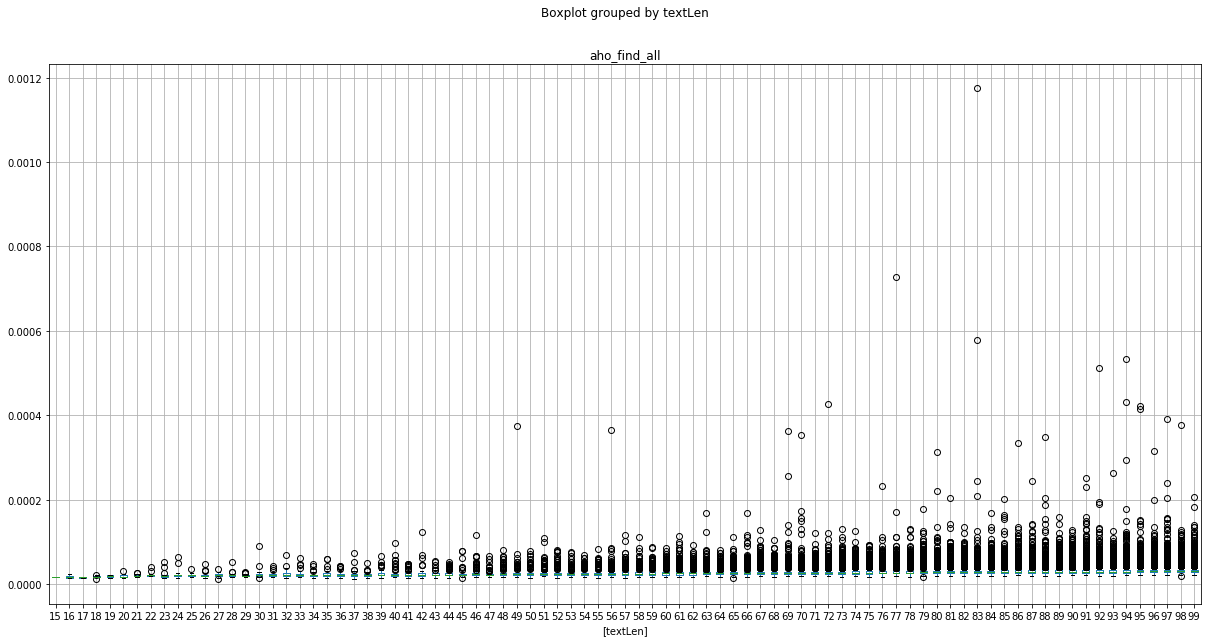

In [38]:
data[:100000].boxplot(column='aho_find_all',  by=['textLen'], figsize=(60,10))
plt.show()
data[(data['textLen'] < 100)].boxplot(column='aho_find_all',  by=['textLen'], figsize=(20,10))
plt.show()

## Фильтрация по textLen < 30 с index = 0

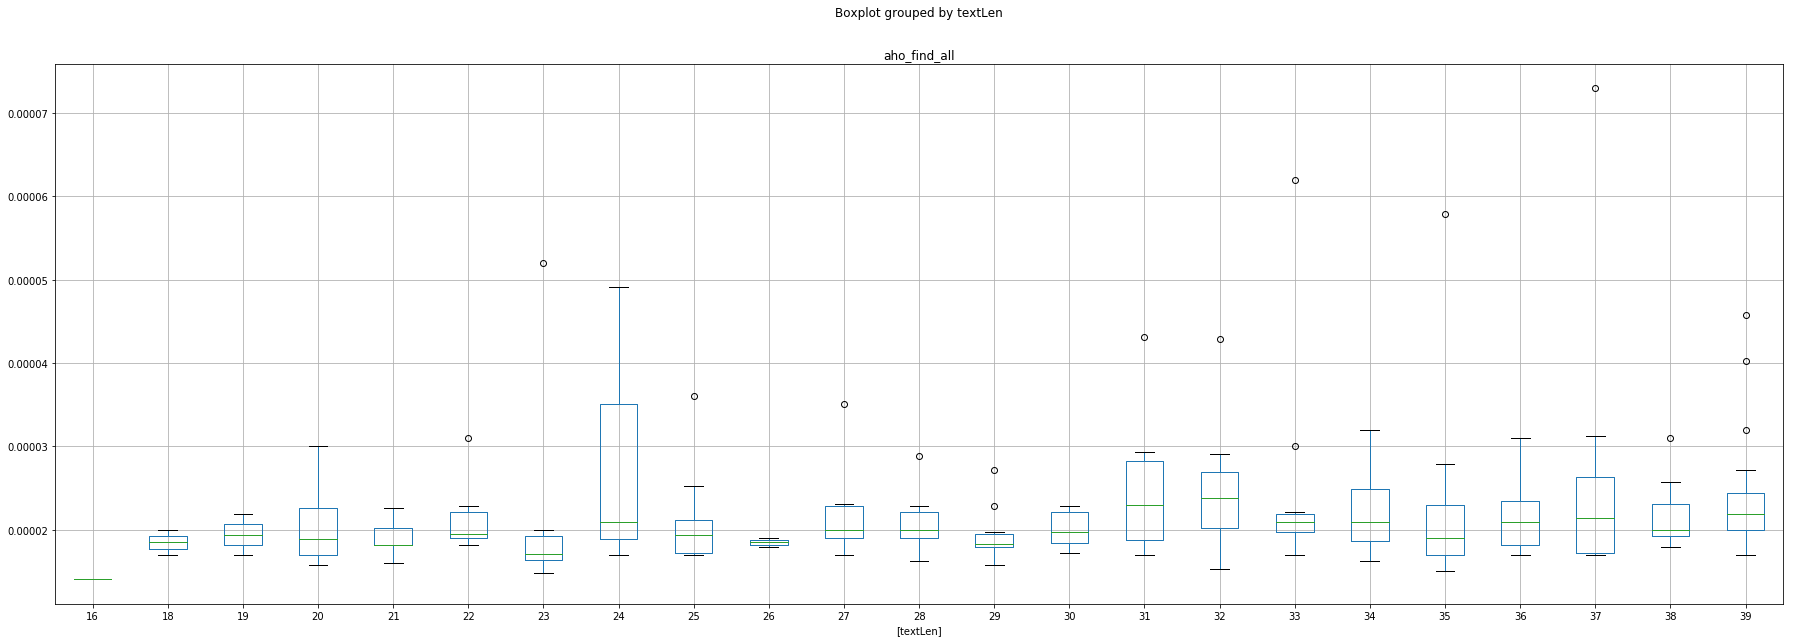

In [40]:
data[(data['index'] == 0) & (data['textLen'] < 40)].boxplot(column='aho_find_all',  by=['textLen'], figsize=(30,10))
plt.show()

### Вывод с помощью scatter_matrix

Метод scatter_matrix позволяет визуализировать попарные зависимости между признаками (а также распределение каждого признака на диагонали).

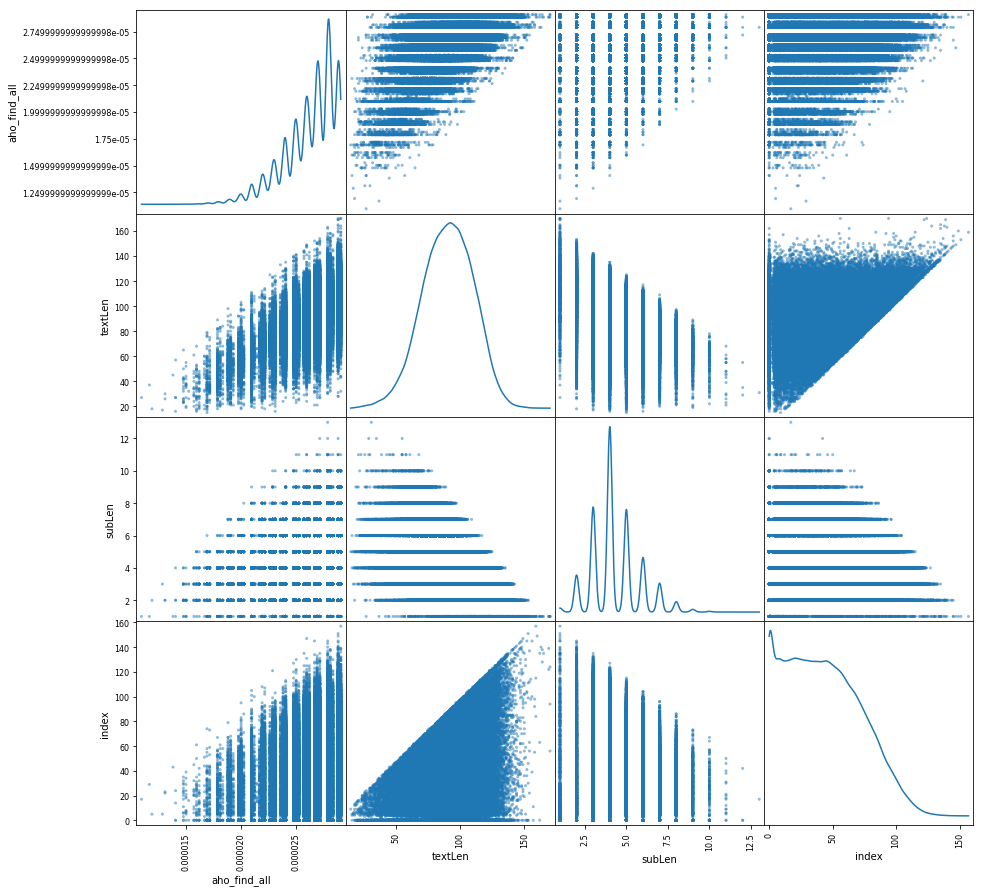

In [28]:
pds.scatter_matrix(tb.sort_values(by='aho_find_all', ascending=True)[:100000][['aho_find_all', 'textLen', 'subLen', 'index']], figsize=(15, 15), diagonal='kde')
plt.show()

## lib_find

### Отфильтруем данные по textLen, subLen, index и построим box plot
Он позволяет компактно визуализировать основные характеристики (медиану, нижний и верхний квартили, минимальное и максимальное значение, выбросы) распределения признаков.

Изменяемое значение | Интервал значений
---| ---
textLen | 15 - 200
subLen | 1 - 14
index | 0 - 197

Чтобы оптимизировать нагрузку уменьшим кол-во данных до 10000 с помощью среза данных.

## Фильтрация по index

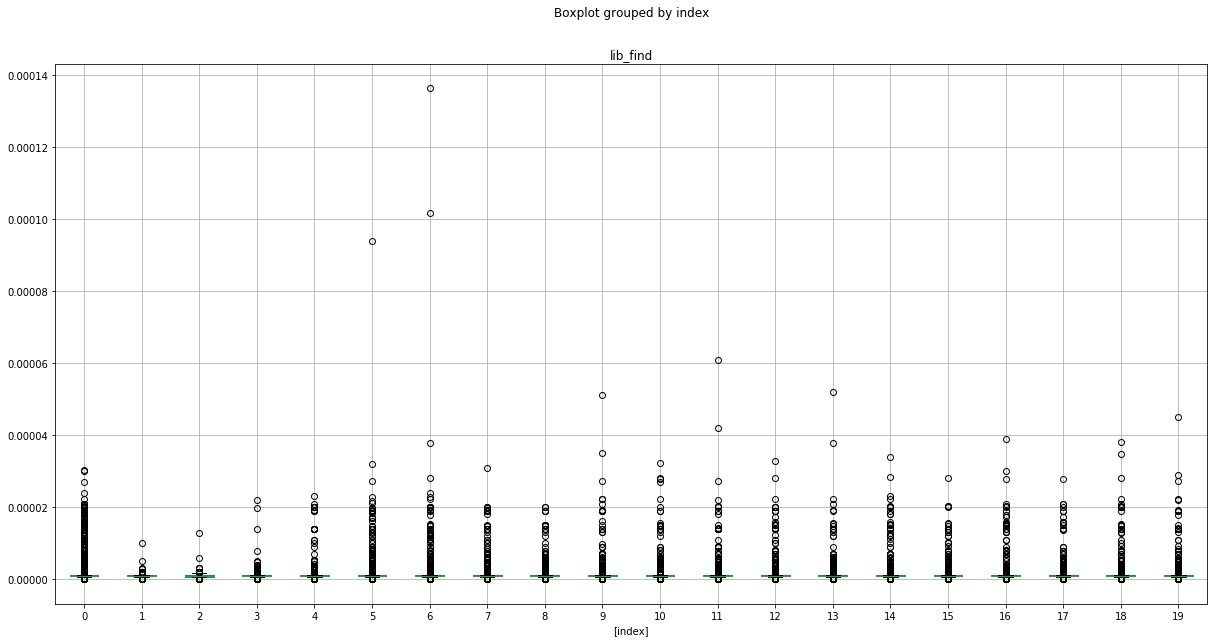

In [41]:
data[(data['index'] < 20)].boxplot(column='lib_find',  by=['index'], figsize=(20,10))
plt.show()

## Фильтрация по subLen

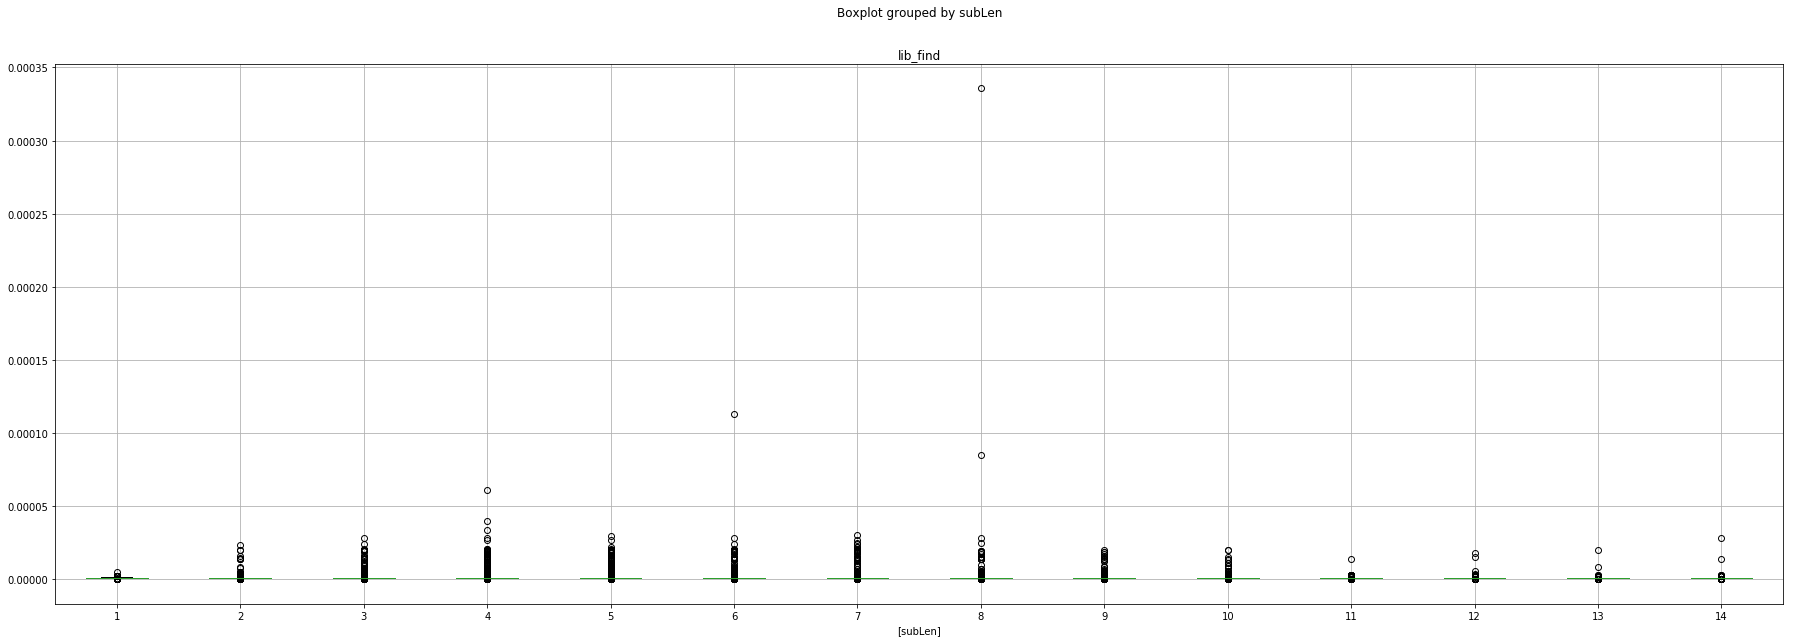

In [42]:
data[:100000].boxplot(column='lib_find',  by=['subLen'], figsize=(30,10))
plt.show()

## Фильтрация по textLen

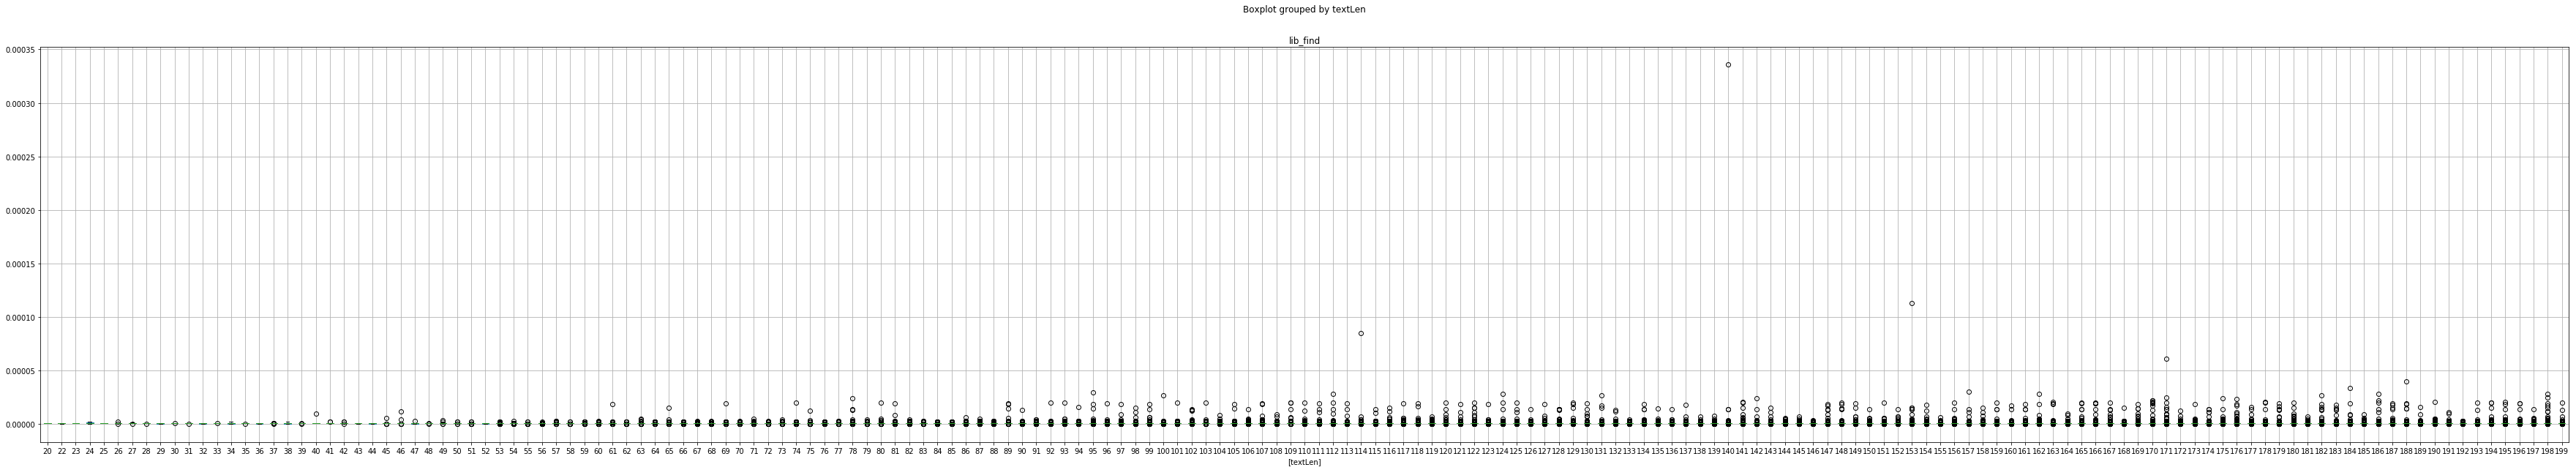

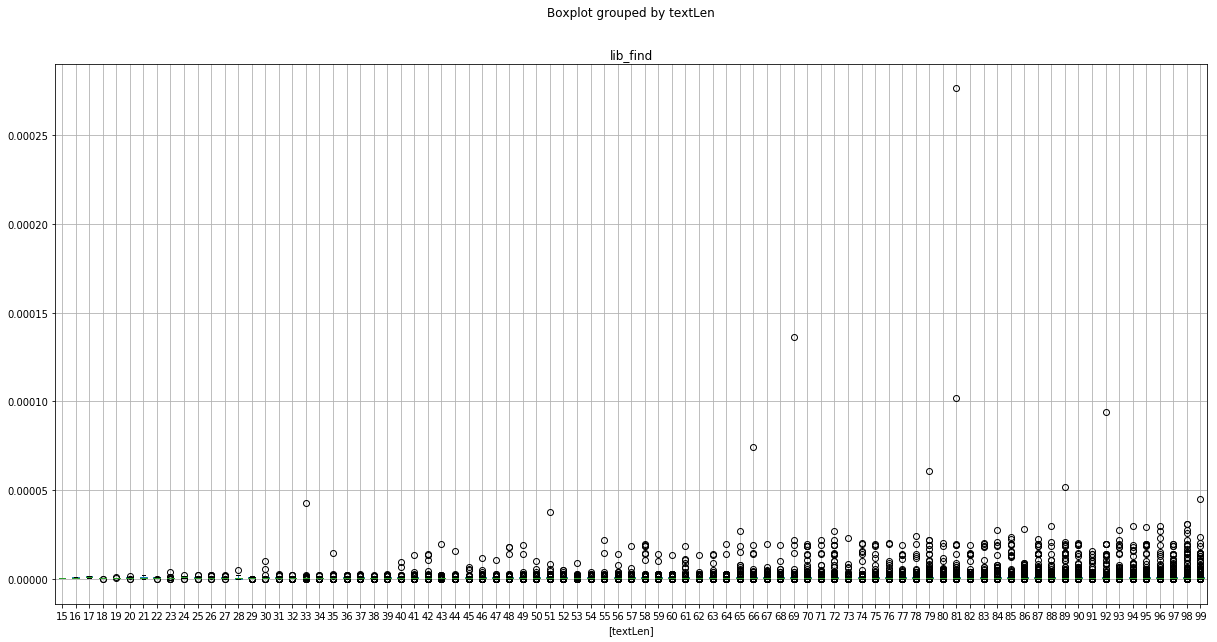

In [43]:
data[:100000].boxplot(column='lib_find',  by=['textLen'], figsize=(60,10))
plt.show()
data[(data['textLen'] < 100)].boxplot(column='lib_find',  by=['textLen'], figsize=(20,10))
plt.show()

## Фильтрация по textLen < 30 с index = 0

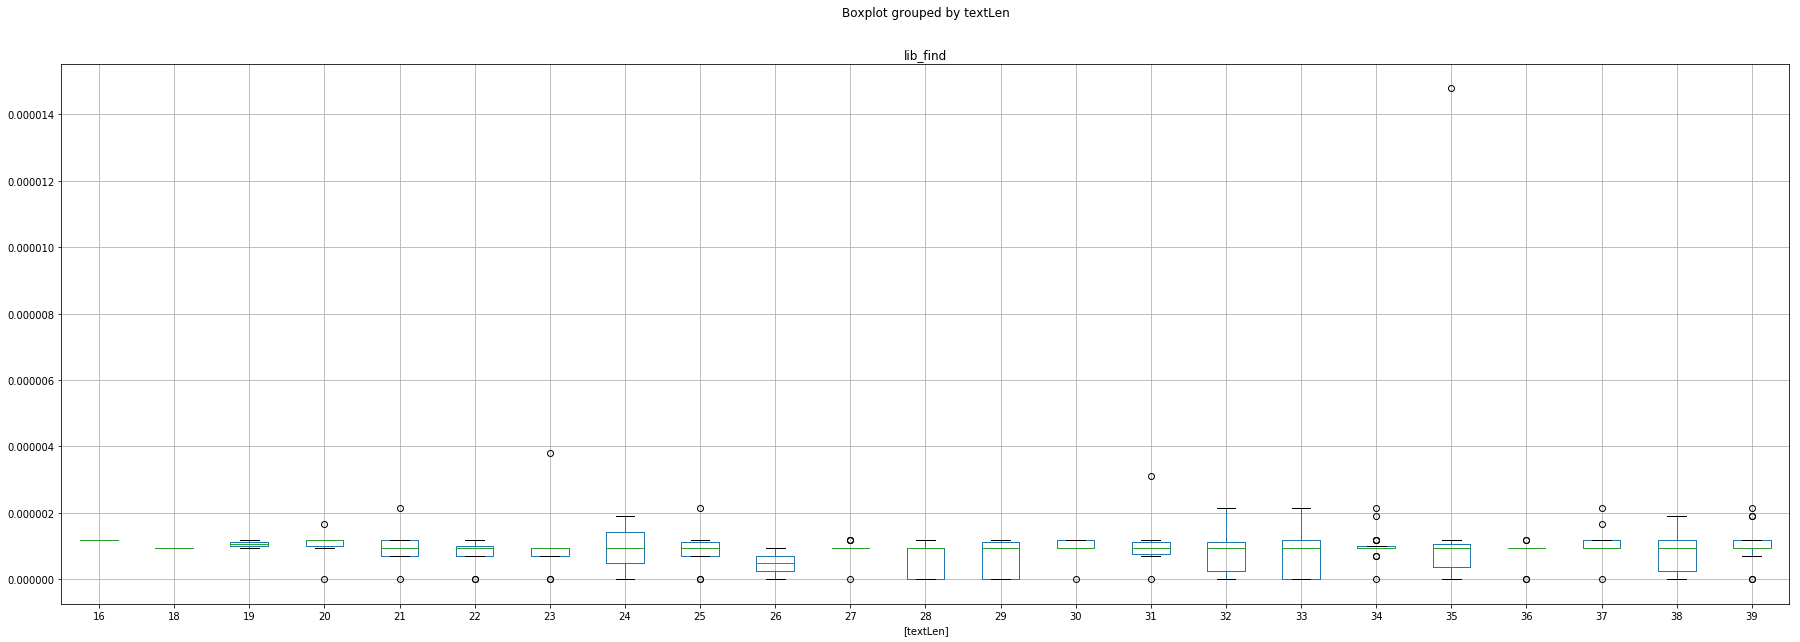

In [44]:
data[(data['index'] == 0) & (data['textLen'] < 40)].boxplot(column='lib_find',  by=['textLen'], figsize=(30,10))
plt.show()

### Вывод с помощью scatter_matrix

Метод scatter_matrix позволяет визуализировать попарные зависимости между признаками (а также распределение каждого признака на диагонали).

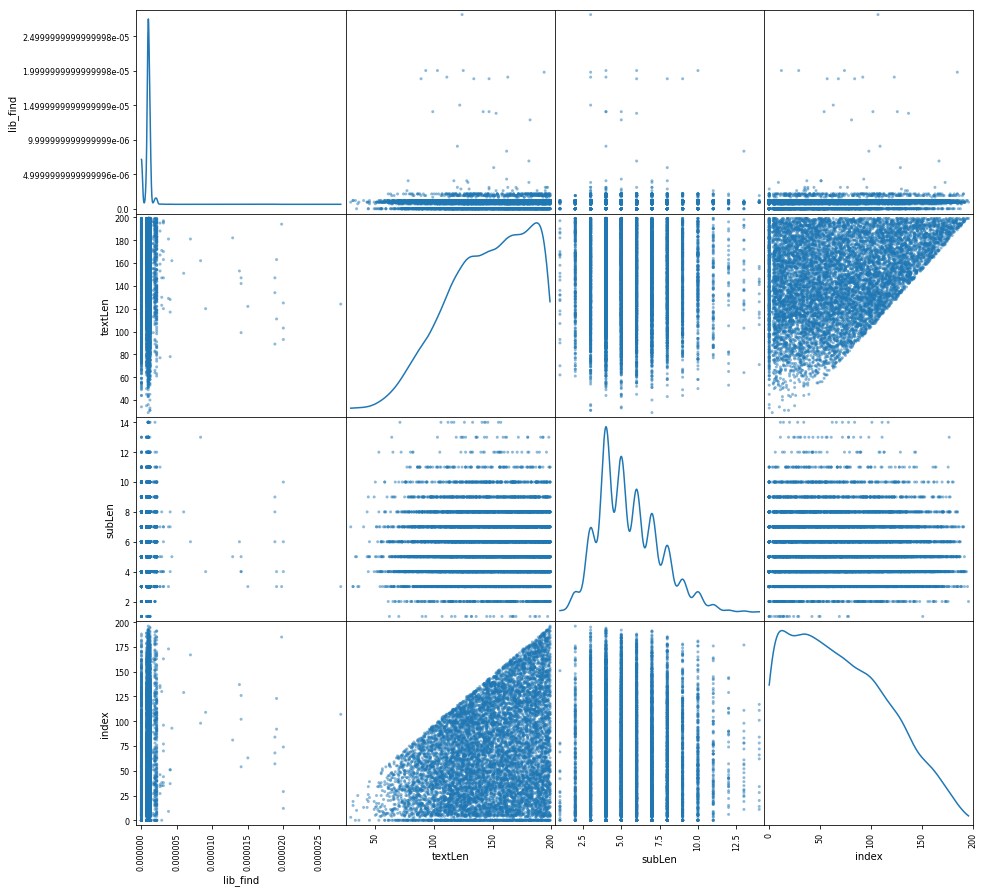

In [32]:
pds.scatter_matrix(tb[:10000][['lib_find', 'textLen', 'subLen', 'index']], figsize=(15, 15), diagonal='kde')
plt.show()

## Seaborn

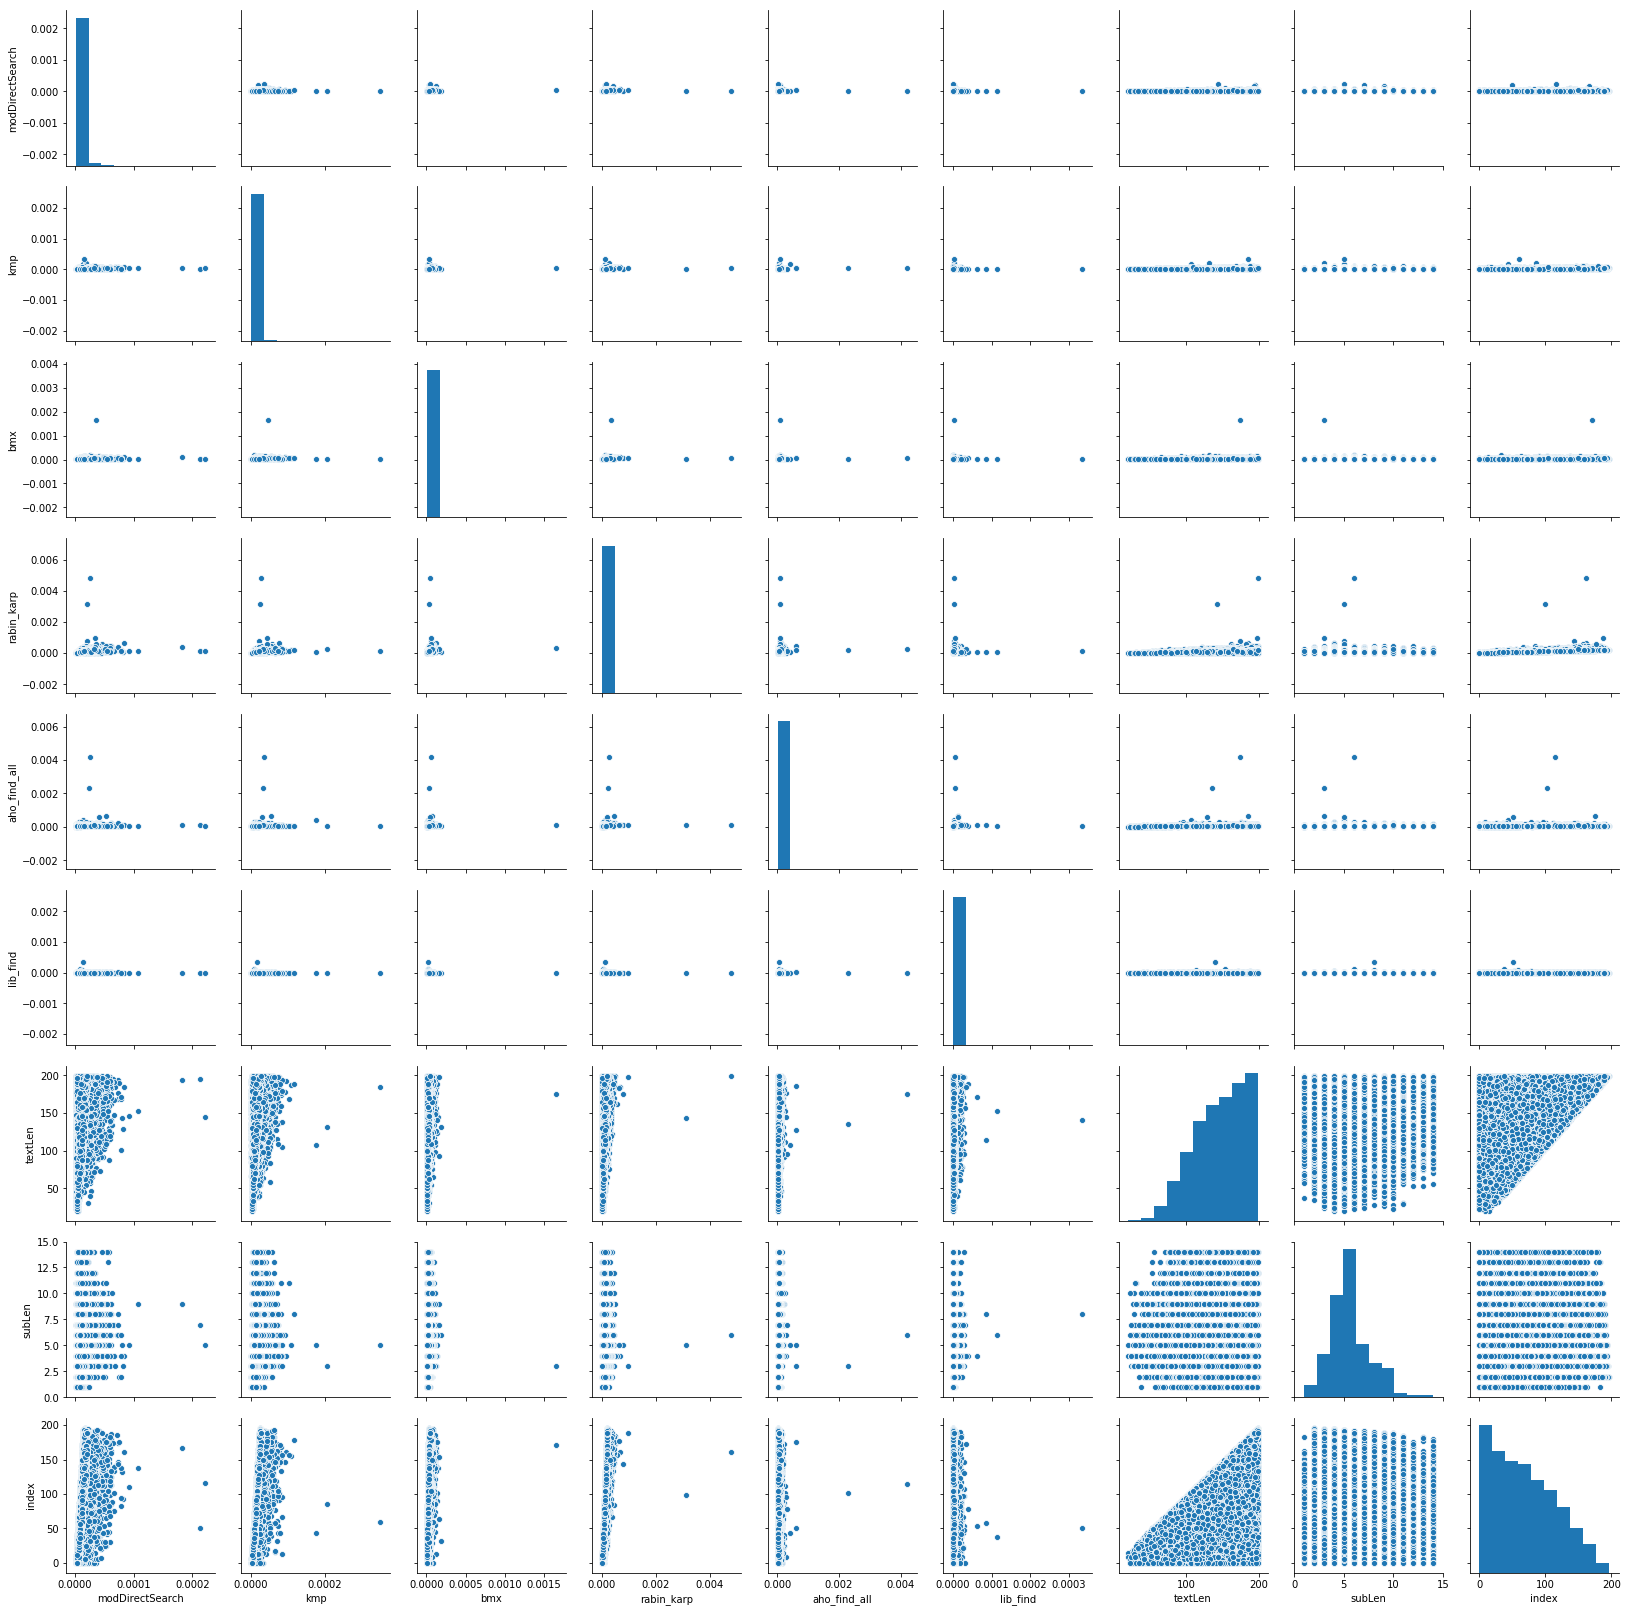

In [34]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(tb[:100000][['modDirectSearch', 'kmp', 'bmx', 'rabin_karp', 'aho_find_all', 'lib_find', 'textLen', 'subLen', 'index']]);

## Plots

In [35]:
import csv

def createSimpleCSV(filename):
    headers = "modDirectSearch,kmp,bmx,rabin_karp,aho_find_all,lib_find,textLen,subLen,index"
    with open(filename, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=headers.split(','))
        writer.writeheader()
        for i in range(tb['index'].max()):
            writer.writerow(dict(tb[tb['index'] == i].mean()))
#             print(tb[tb['index'] == i].mean())
    return

In [36]:
createSimpleCSV('./substrSimple.csv')

In [37]:
dt = pd.read_csv('./substrSimple.csv')
dt.head()

modDirectSearch       kmp       bmx  rabin_karp  aho_find_all  \
0         0.000003  0.000004  0.000005    0.000008      0.000038   
1         0.000003  0.000003  0.000004    0.000008      0.000036   
2         0.000003  0.000003  0.000005    0.000010      0.000037   
3         0.000003  0.000004  0.000006    0.000012      0.000038   
4         0.000004  0.000004  0.000006    0.000013      0.000039   

       lib_find     textLen    subLen  index  
0  9.790334e-07  136.724693  5.580758    0.0  
1  9.811286e-07  147.066667  2.021212    1.0  
2  9.536743e-07  144.116883  3.207792    2.0  
3  9.864206e-07  138.729364  5.247632    3.0  
4  1.000129e-06  136.474420  5.515388    4.0

## f(index) = substr

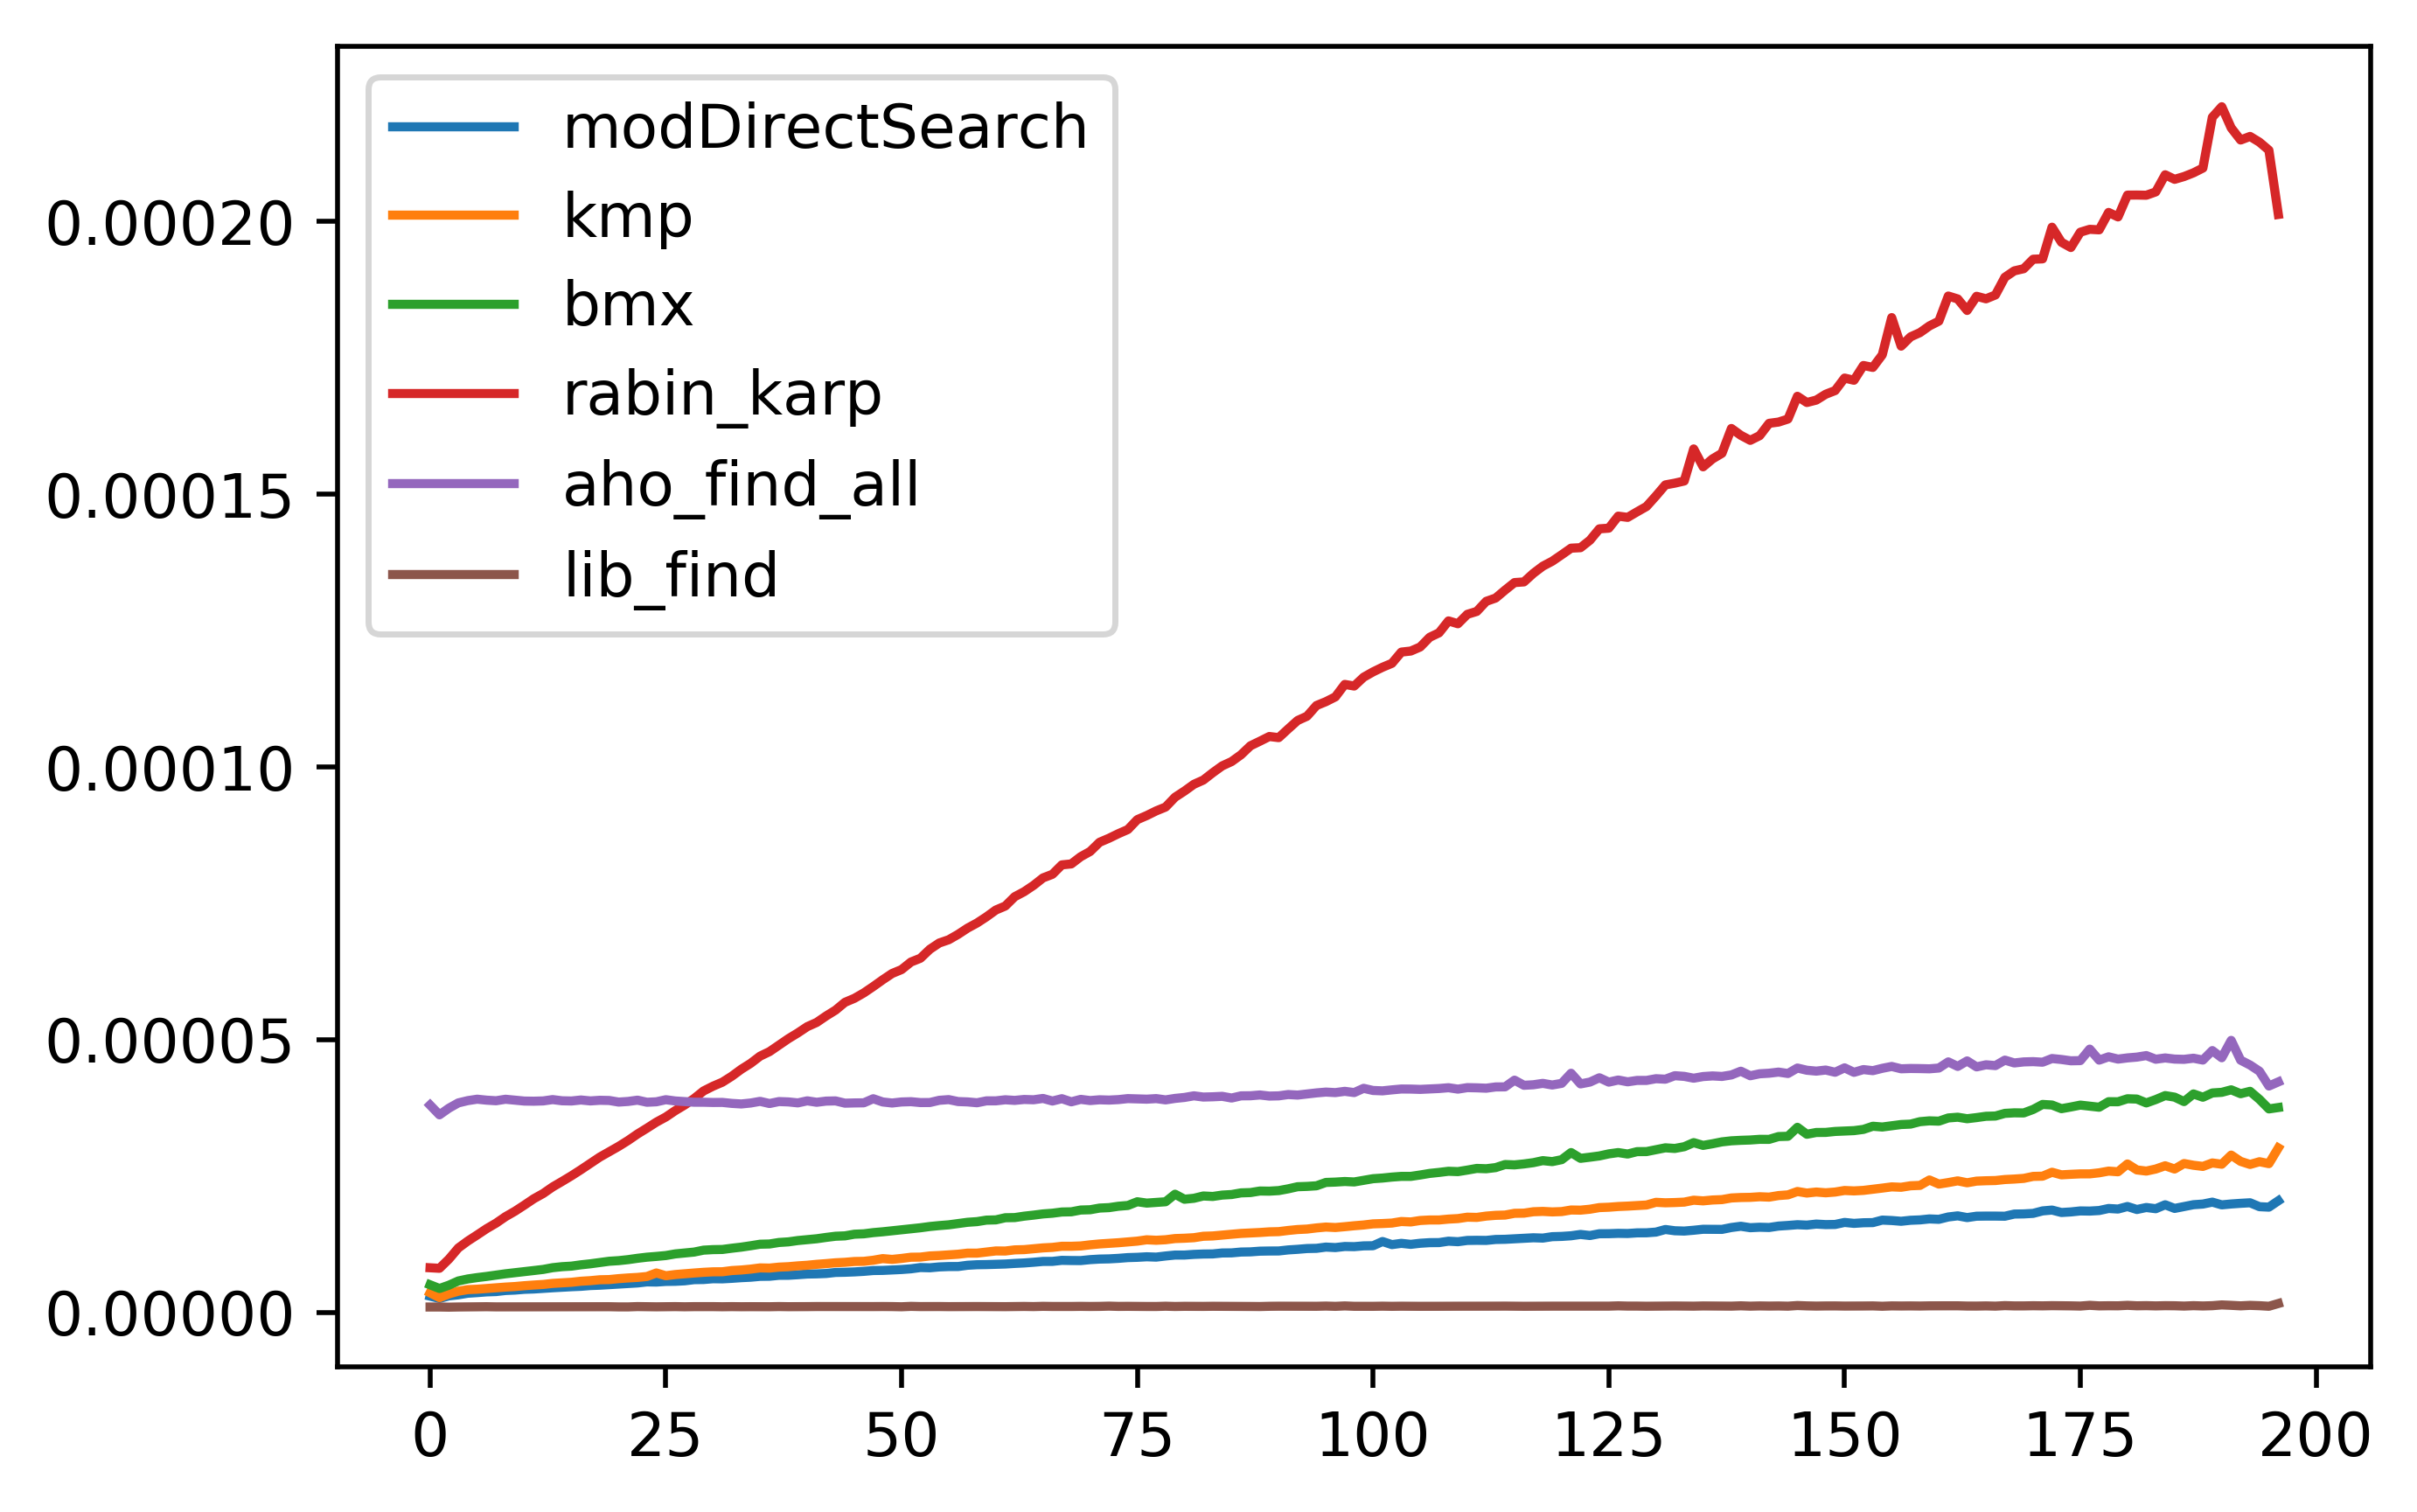

In [38]:
plt.figure(dpi=500);
plt.plot(dt['index'], dt['modDirectSearch']);
plt.plot(dt['index'], dt['kmp']);
plt.plot(dt['index'], dt['bmx']);
plt.plot(dt['index'], dt['rabin_karp']);
plt.plot(dt['index'], dt['aho_find_all']);
plt.plot(dt['index'], dt['lib_find']);
plt.legend(['modDirectSearch', 'kmp', 'bmx', 'rabin_karp', 'aho_find_all', 'lib_find']);

## f(subLen) = substr

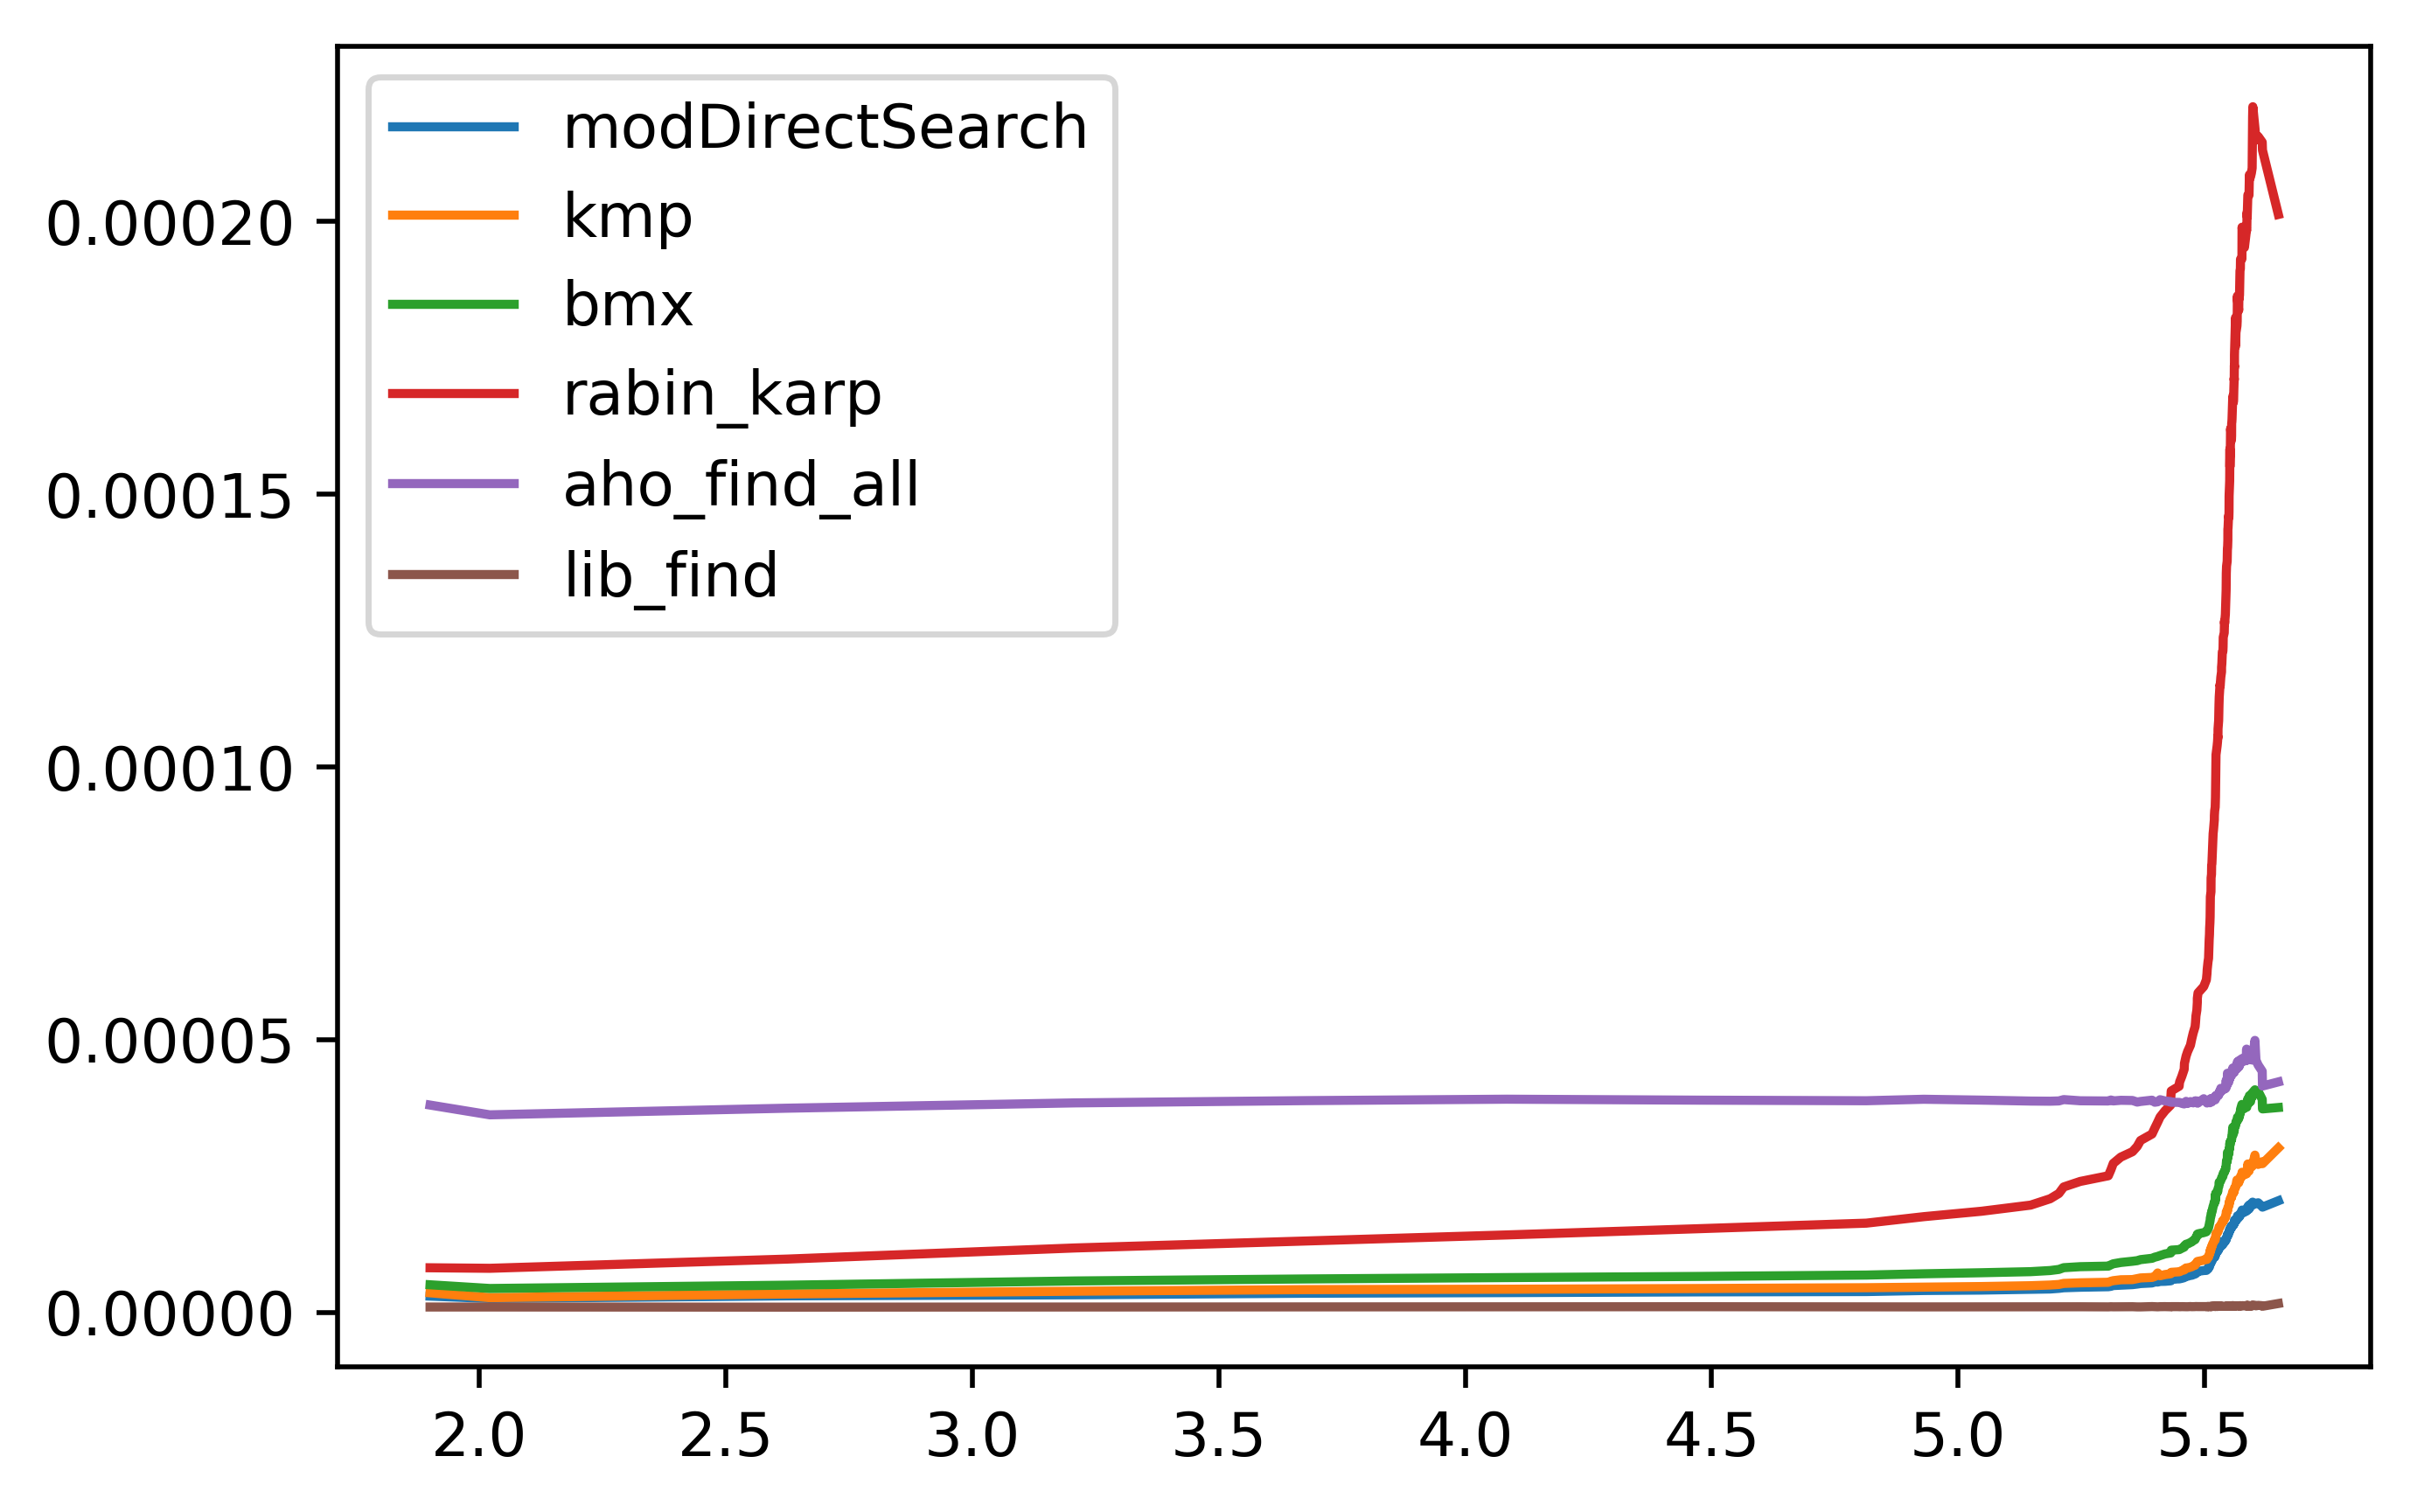

In [39]:
plt.figure(dpi=500);
plt.plot(dt.sort_values(by='subLen', ascending=True)['subLen'], dt['modDirectSearch']);
plt.plot(dt.sort_values(by='subLen', ascending=True)['subLen'], dt['kmp']);
plt.plot(dt.sort_values(by='subLen', ascending=True)['subLen'], dt['bmx']);
plt.plot(dt.sort_values(by='subLen', ascending=True)['subLen'], dt['rabin_karp']);
plt.plot(dt.sort_values(by='subLen', ascending=True)['subLen'], dt['aho_find_all']);
plt.plot(dt.sort_values(by='subLen', ascending=True)['subLen'], dt['lib_find']);
plt.legend(['modDirectSearch', 'kmp', 'bmx', 'rabin_karp', 'aho_find_all', 'lib_find']);

## f(textLen) = substr

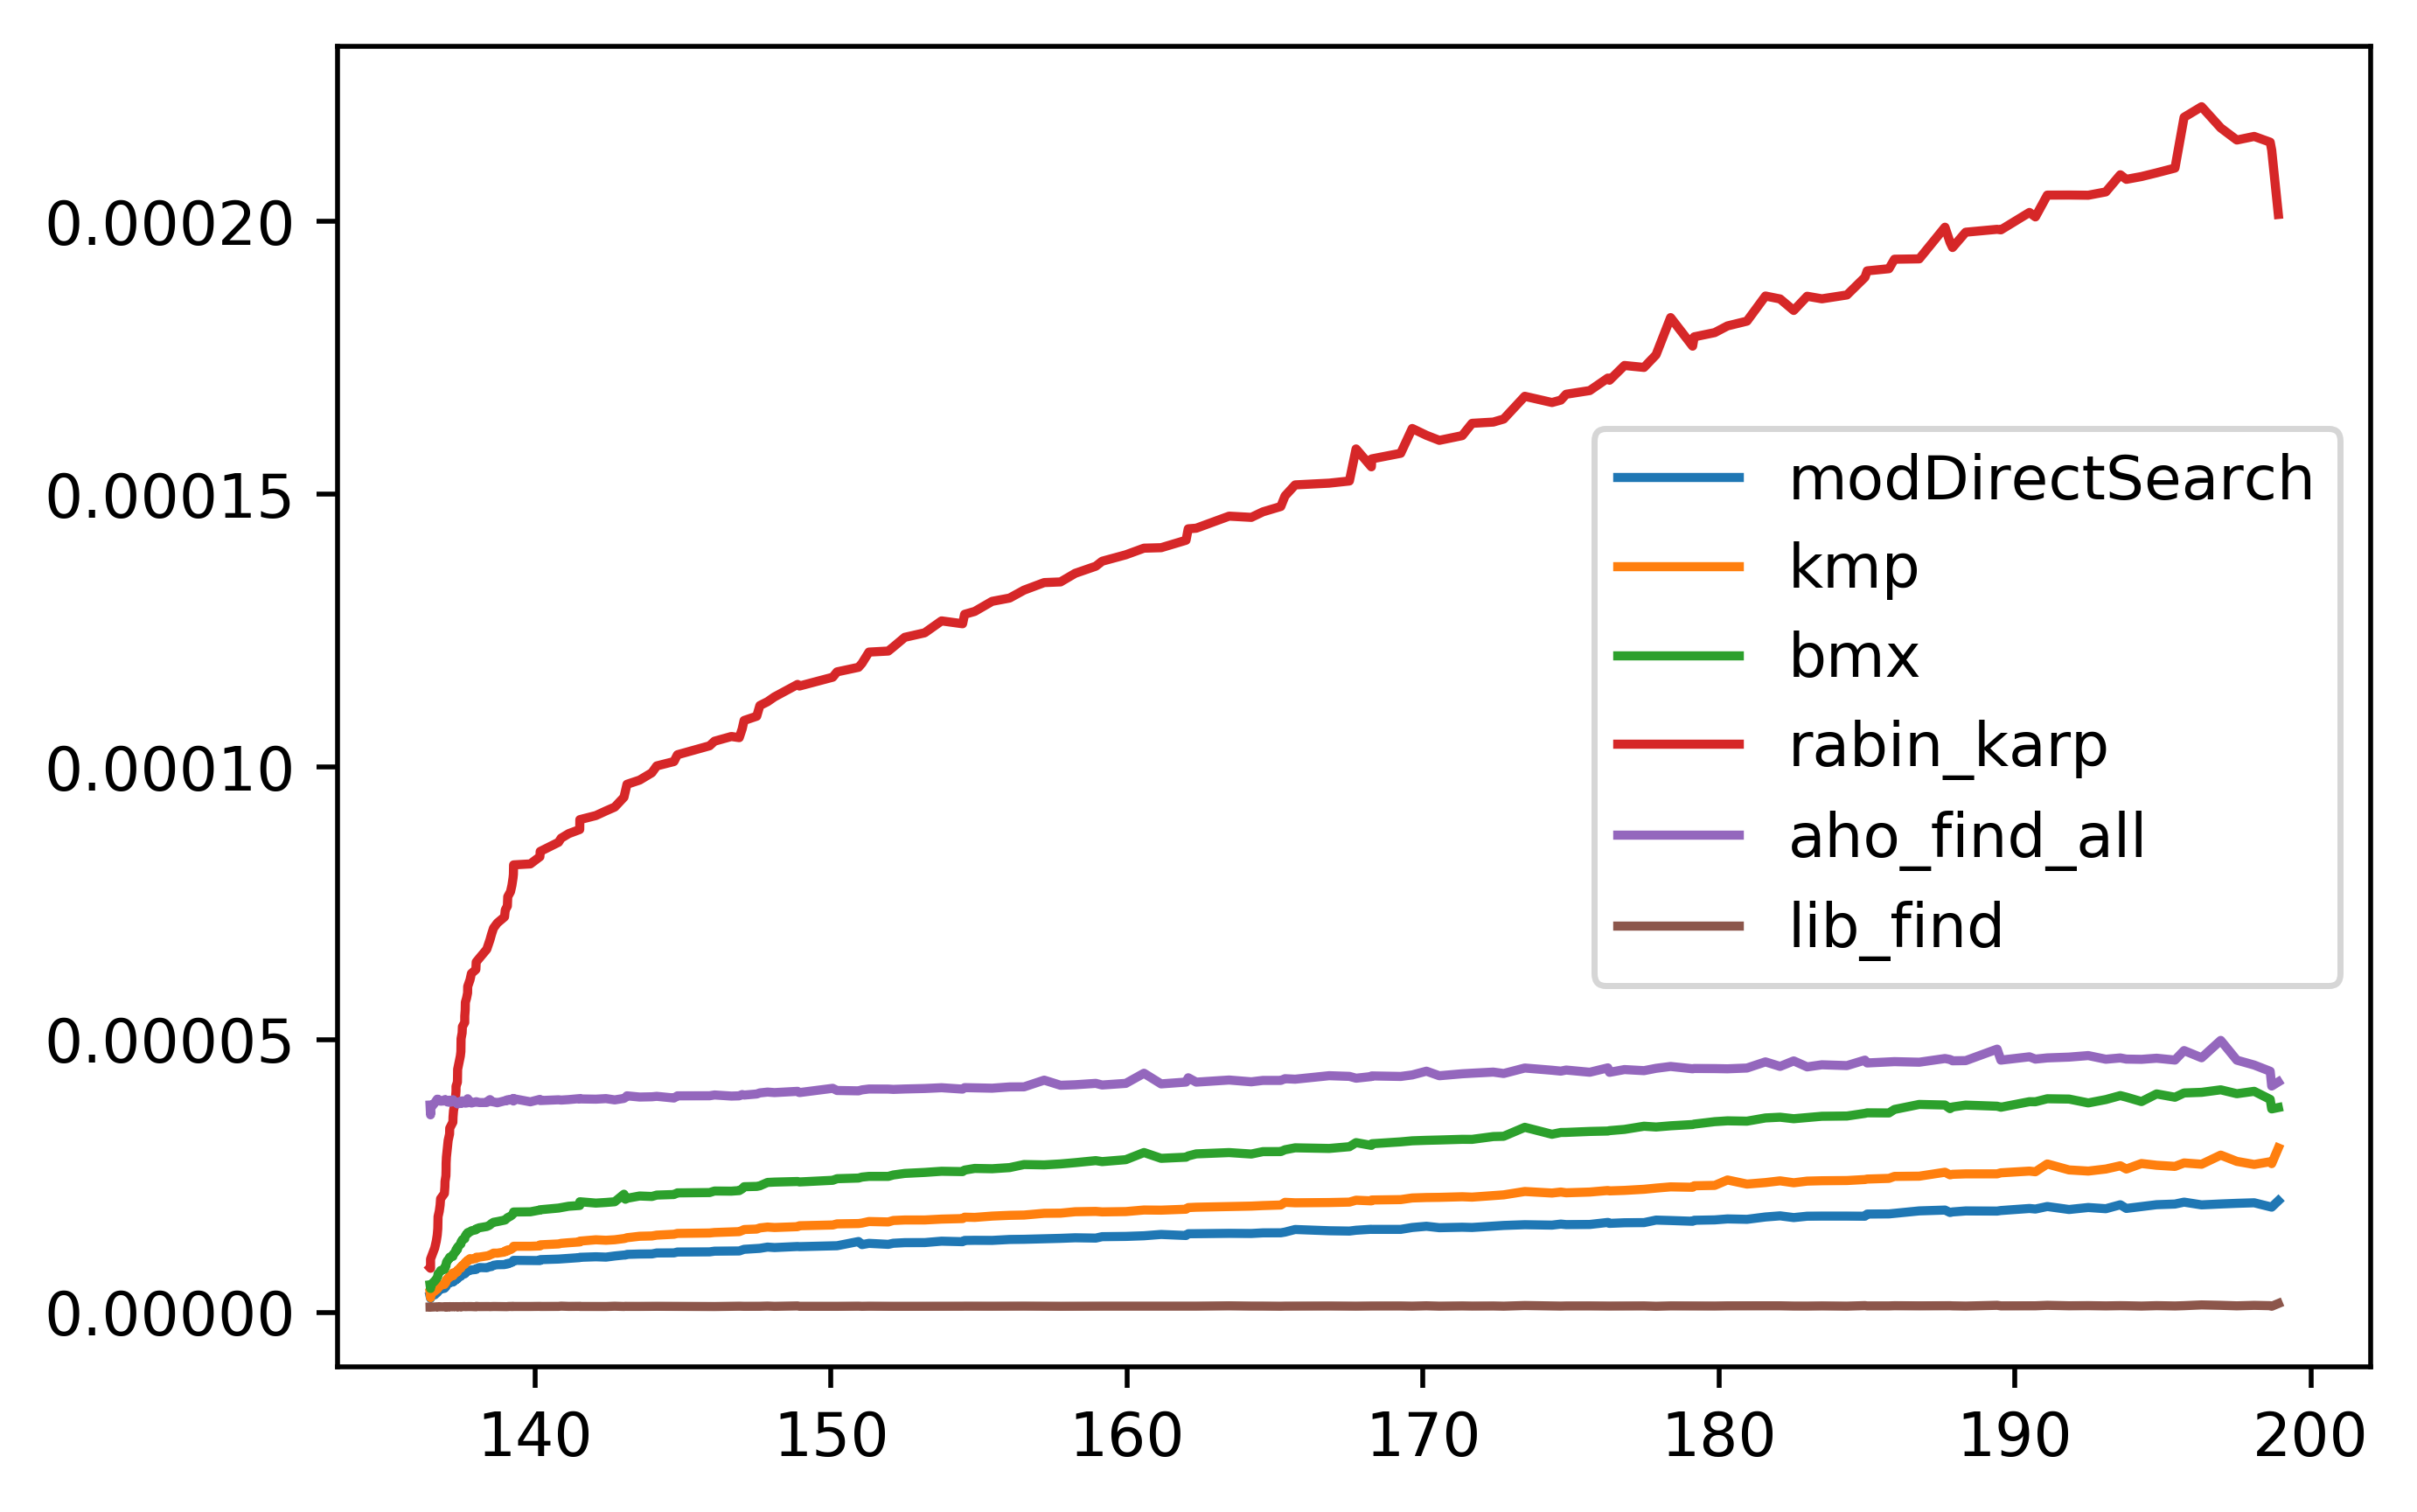

In [40]:
plt.figure(dpi=500);
plt.plot(dt.sort_values(by='textLen', ascending=True)['textLen'], dt['modDirectSearch']);
plt.plot(dt.sort_values(by='textLen', ascending=True)['textLen'], dt['kmp']);
plt.plot(dt.sort_values(by='textLen', ascending=True)['textLen'], dt['bmx']);
plt.plot(dt.sort_values(by='textLen', ascending=True)['textLen'], dt['rabin_karp']);
plt.plot(dt.sort_values(by='textLen', ascending=True)['textLen'], dt['aho_find_all']);
plt.plot(dt.sort_values(by='textLen', ascending=True)['textLen'], dt['lib_find']);
plt.legend(['modDirectSearch', 'kmp', 'bmx', 'rabin_karp', 'aho_find_all', 'lib_find']);